Data sets format: 
files:
* TotalFlights.csv
* DelayFlights.csv
* DelayRatio.csv
* airport2idx.csv
* time_stamp2idx.csv
* test.csv
* readme.ipynb

**this.ipynb provide helper function and a top class `GraphFlow` object  `gf`.(section 1)and some methods to provide analysis. report (section 2) **

The `GraphFlow` object `gf` encapsulate the following data:

* `gf.TotalFlights`: pd.DataFrame with value  of shape (N,A)

`gf.TotalFlights[t,i]` is number of flights between [`idx2time_stamp[t]`,`idx2time_stamp[t] + dt`) at airport `idx2airport[i]`

* `gf.DelayFlights`: pd.DataFrame with value of shape (N,A)

`gf.DelayFlights[t,i]` is number of delayed flights between [`idx2time_stamp[t]`,`idx2time_stamp[t] + dt`) at airport `idx2airport[i]`

* `gf.DelayRatio`:  pd.DataFrame with value of shape (N,A)

`gf.DelayRatio[t,i] = DelayFlights[t,i] / TotalFlights[t,i]`

* `gf.RealTotalFlights`,`gf.RealDelayFlights`,`gf.RealDelayRatio`: pd.DataFrame with same value but with real index

* `gf.idx2airport`: dict 

`gf.idx2airport[i]` return  the iata name for airport index ` i `

* `gf.airport2idx`: dict

inverse to `idx2airport`

* `gf.idx2time_stamp`: dict

`gf.idx2time_stamp[t]` return  the timestamp for time index ` t `

* `gf.time_stamp2idx`: dict

inverse to `idx2time_stamp[t]`

* `gf.dt`:pd.TimeDelta 

`1D` or `1H` so far

* `test_index` :list of lenth M
element is time index at which model predicts the delay ratio. In our case, all elements `tidx in test_index`' satisfy `idx2time_stamp[tidx]` after `2018-01-01 00:00:00`

* `gf.G` :  nx.DiGraph with edges having weight attr as the total flights in  time range.

* `gf.pre_data` provide pre-cleaned raw data in time range.

`GraphFlow`  provide some functions. 

* `gf.describe()` : describe the current GraphFlow obeject

* `gf.real_format(df)` : convert a dataframe into colums by timeseris and index by airports names
* `gf.draw_network_attr(nodes_attr= None,edges_attr='weight',size=10,with_pos=True)` :  draw undirected graph `fun_1_to_undir_G(G)` try several times to get a better display

* `gf.sub_graph_flow(start_time = None,end_time = None,sub_nodes = None, edges = None)` : 

** Generate a sub  graph flow. In this case all 'DataFrame' including `TotalFlights`,`DelayFlights`,`DelayRatio` will be re-computed as sub_nodes will build a smaller GraphFlow.  and `G` will be updated as well

** If `sub_nodes` is `None` and `edges` is `None` , only weight of `G` will be recomputed, `pre_data` and `TotalFlights`,`DelayFlights`,`DelayRatio`will be sliced accordingly, which is fast. 

** If `sub_nodes` is `None` and `edges` is not `None`, generated a `GraphFlow` object with given `edges`. all data `G` `pre_data` , `TotalFlights`,`DelayFlights`,`DelayRatio` will be recomputed. It may be slower



`readme.ipynb` also provide a model evaluation function `model_evaluation(pred_data)`. 

* 1. run next block to generate data
* 2. tune your model, generate a np.ndarrays obeject `pred_data` of shape  `(M,A)`
`pred_data[j,:]` gives the predicted delay ratio for time index `test_index[j]`
* 3. report `model_mse(pred_data)`, save `pred_data`



## Multi-linear regression task for ArrDelayFlights for a given airport.

Using the material https://newonlinecourses.science.psu.edu/stat501/lesson/welcome-stat-501 Lesson 5,6,7,9,10. To do a multiMulti linear regression.

* 1.Choose four representive airports (One 'LAX', one other big airport, one middle, one small airport) for each airport `a` and `gf.dt` do the following.
* 2. The responce is the `gf.DepDelayFlights[t,a]` which stands for the numbr of ArrDelayFlights for `a` between `t` and `t`+`gf.dt`, where `t` takes values in `gf.grid`and `t` later than `2018/01/01`
* 3. The predictors are chosen manully. Here is general rules:
* 3.1 all predictors should be obtained before or at `t` 
* 3.2 here are some candidates: 
* 3.2.1 timeseries flavored predictors : lags `gf.ArrDelayFlights[t-1,a]`,`gf.ArrDelayFlights[t-2,a]`,..., 
* 3.2.2 `gf.ArrDelayFlights[t-1,a]`, `t` correspoding time status `is_Tuesday`,`is_Monday`,..., `is_Weekend`, `is_Holiday`,`season`,
* 3.2.3 some constructed data: e.g. average of ArrDelayFlights at `t-1` for all airports which is the neighbour of `a`
* 4. about model building. try to understand the data and answer following question, which predictors best gives the best fit. If the fit is not good try to do the following

>If important predictor variables are omitted, see whether adding the omitted predictors improves the model.

>If the mean of the response is not a linear function of the predictors, try a different function. For example, polynomial regression involves transforming one or more predictor variables while remaining within the multiple linear regression framework. For another example, applying a logarithmic transformation to the response variable also allows for a nonlinear
relationship between the response and the predictors while remaining within the multiple linear regression framework.

>If there are unequal error variances, try transforming the response and/or predictor variables or use "weighted least squares regression."

>If an outlier exists, try using a "robust estimation procedure."

>If error terms are not independent, try fitting a "time series model."
> Try some data transformations

* 5 python,R either is ok only report is needed.






##  Coding instruction for gf.quotient_graph_flow(self, start_time,end_time,node_groups = None)
* 0. `start_time`,`end_time` are `str` nodes_groups is of type `**str`
* 1. Return a `GraphFlow` object `quo_gf` and `dict` object `group_names`
* 2. Do the following:
* 2.0 if not `node_groups` run gf.sub_graph(start_time,end_time)
* 2.1 check `node_groups` is a partition of `self.G.nodes` if not: raise error.
* 2.2 `quo_gf` has following data:
* 2.2.1 `quo_gf.G` has nodes with aritrary distinct names of `str` type(four letters maybe?), for each one node correspond to a group in `node_groups`, generate a dict `group_names` with key being node ,value is corresponding group in `node_groups`
* 2.2.11 node in `quo_gf.G` has no `weight` attr if it raise a problem contact Jiayin
* 2.2.12 node in `quo_gf.G` has `pos` attr ,randomly given (may use spring_layout)
* 2.2.21 edges`(a,b)` in `quo_gf.G.edges` has `weight` attr , the `sum` of number of flights in self.pre_data within `grid`
check sub_graph to see how to generate it using `start_time`,`end_time`.
* 2.2.22 edges`(a,b)` in `quo_gf.G.edges` has `distance` attr , the `mean` of `Distance` of flights in self.pre_data within `grid`(one may use approximation to faster this computation,weighted sum of distance in self.G.edges?)
check `sub_graph_flow()` to see how to generate it using `start_time`,`end_time`.
* 2.2.3 `quo_gf.pre_data` has records `rec` in self.predata within `grid`, check `sub_graph_flow()` for within's meaning. `rec.Origin` should update to `a` if `rec.Origin` in `group_names[a]`. update `rec.Dest` similarly
* 2.2.4 generate other data in `quo_gf` accordingly. 

* 3. coding efficiently note that the nodes has size around 311 pre_data has size 14M.  if necessary reconstruct `fun_1_delay_rate()` as it is the bottle neck.
* 4. write a demo testing all available member function for `quo_gf`


In **this** notebook,  run `gf.describe()` to see general infomation
When using model to pridiction. one **CAN NOT** use the data at or after `idx2time_stamp[t]` to

## 1 GraphFlow class and demos

In [79]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm

from datetime import datetime,timedelta
from pytz import timezone
from time import time

from collections import deque
from functools import reduce
from itertools import chain
from IPython.display import clear_output
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.arima_model import ARIMA


  
def model_evaluation(pred_data,test_data=None):
    test_index=list(pd.read_csv("test.csv",index_col=0,header=None).values.T[0,:])
    DelayRatio=pd.read_csv("DelayRatio.csv",index_col=0)
    return np.mean(np.mean(np.square(DelayRatio.fillna(0).iloc[:,test_index].T-pred_data),axis=0))

In [2]:
class GraphFlow:
    #================= 08/16/19 maintained by Jiayin Guo=============
    def __init__(self,idx2airport,airport2idx,idx2time_stamp,time_stamp2idx,TotalFlights,DelayFlights,pre_data,G,dt,grid = None ,start_time = None,end_time = None,DelayRatio=None):
        self.idx2airport = idx2airport
        self.airport2idx = airport2idx
        self.idx2time_stamp = idx2time_stamp
        self.time_stamp2idx = time_stamp2idx
        self.TotalFlights = TotalFlights
        self.DelayFlights = DelayFlights
        self.G = G
        self.pre_data=pre_data
        self.dt = dt
        
        #=========== self.grid=============
        if grid is not None:
            self.grid = grid
        elif (start_time is not None) & (end_time is not None):
            self.grid = pd.date_range(start_time,end_time,freq=dt,tz=timezone('America/Los_Angeles'))
        else:
            raise
        #=========== self.DelayRatio=============
        if DelayRatio is not None:
            self.DelayRatio = DelayRatio
        else:
            print(DelayFlights.shape)
            print(TotalFlights.shape)
            self.DelayRatio = pd.DataFrame(data=DelayFlights.values/TotalFlights.values,index=DelayFlights.index,
                   columns=DelayFlights.columns)
            
        #=================self.RealDelayRatio,RealTotalFlights,RealDelayFlights====
        self.RealDelayRatio = self.DelayRatio.rename(index = self.idx2time_stamp).rename(columns = self.idx2airport)
        self.RealDelayFlights = self.DelayFlights.rename(index = self.idx2time_stamp).rename(columns = self.idx2airport)
        self.RealTotalFlights = self.TotalFlights.rename(index = self.idx2time_stamp).rename(columns = self.idx2airport)
            
        
        return
          
    def draw_network_attr(self, nodes_attr = None , edges_attr = 'weight' , size = 6 , with_pos = True):
        plt.figure(1,figsize=(size,size))
        G=self.to_undir_G(self.G)
        if nodes_attr == 'TimeModifyer':
            labels={node:value.total_seconds()/3600 for node,value in nx.get_node_attributes(G,nodes_attr).items()}
        elif nodes_attr =='time_zone':
            labels={node:value.split('/')[1] for node,value in nx.get_node_attributes(G,nodes_attr).items()}
        elif nodes_attr is None:
            labels=None
        else:
            raise  
       
        pos=nx.get_node_attributes(G,'pos')
        if not with_pos:
            pos=nx.spring_layout(G)
        nx.draw(G,pos=pos,labels = labels)
        nx.draw_networkx_edge_labels(G,pos=pos,edge_labels=nx.get_edge_attributes(G,edges_attr))
        plt.show()
        return

    def real_format(self,df):
        return df.rename(columns = self.idx2time_stamp).rename(index = self.idx2airport)
    
    def slice(self,start_time,end_time):
        idx2airport = self.idx2airport
        airport2idx = self.airport2idx
        idx2time_stamp = self.idx2time_stamp
        time_stamp2idx =self. time_stamp2idx
        dt = self.dt
        grid =  pd.date_range(start_time,end_time,freq=dt,tz=timezone('America/Los_Angeles'))
        G = self.G
        
        t= time()
        # 0 generate edges
        edges = set(self.G.edges)
        print("==============edges generated: ", t-time())
        # 1 generate new pre_data
        

        pre_data = self.pre_data[(self.pre_data.AbsArrTime >= str(grid[0])) &
                                 (self.pre_data.AbsDepTime <= str(grid[-1]))]
        
        print("===============pre_data generated: ", t-time())
        
        # 2 use pre_data to generate G

        G = self.G.edge_subgraph(edges).copy()
        temp = pre_data.groupby(['Origin','Dest'],as_index=False)['Year'].count().rename(columns = {"Year": "weight"})
        nx.set_edge_attributes(G, temp.set_index(['Origin','Dest']).to_dict('index'))
        
        # 3 use pre_data, G to generate TotalFlights, DelayFlights
        TotalFlights = self.TotalFlights[(self.TotalFlights.index >= self.time_stamp2idx[grid[0]]) &
                                           (self.TotalFlights.index <= self.time_stamp2idx[grid[-1]])
                                          ]
        DelayFlights = self.DelayFlights[(self.DelayFlights.index >= self.time_stamp2idx[grid[0]]) &
                                           (self.DelayFlights.index <= self.time_stamp2idx[grid[-1]])
                                          ]
        
        return GraphFlow(idx2airport,airport2idx,idx2time_stamp,time_stamp2idx,TotalFlights,DelayFlights,pre_data,G,dt,
                   grid = grid)
        

    def sub_graph_flow(self, start_time = None , end_time = None ,sub_nodes = None, edges = None , verbose = False):
        idx2airport = self.idx2airport
        airport2idx = self.airport2idx
        idx2time_stamp = self.idx2time_stamp
        time_stamp2idx =self. time_stamp2idx
        dt = self.dt
        if start_time is None:
            start_time = str(self.grid[0])[:-6]
            
        if end_time is None:
            end_time = str(self.grid[-1])[:-6]
            
        grid =  pd.date_range(start_time,end_time,freq=dt,tz=timezone('America/Los_Angeles'))
        
        # -1 determine if a faster algrithm apllies
        if (sub_nodes is None) & (edges is None):
            
            return self.slice(start_time,end_time)
        
        if (sub_nodes is not None) & ((edges is not None)):
            print('TODO: sub_nodes and edges can not both None ')
            raise
        t=time()    
        # 0 generate edges
        if edges is None:
            edges = set(self.G.subgraph(sub_nodes).copy().edges)
        print("==============edges generated: ", t-time())
        # 1 generate new pre_data
        

        pre_data_temp = self.pre_data[(self.pre_data.AbsArrTime >= str(grid[0])) &
                                 (self.pre_data.AbsDepTime <= str(grid[-1]))]
        
        pre_data = pre_data_temp.groupby(['Origin','Dest']).filter(lambda x: x.name in edges) 
        print("===============pre_data generated: ", t-time())
        
        # 2 use pre_data to generate G

            
        G = self.G.edge_subgraph(edges).copy()
        temp = pre_data.groupby(['Origin','Dest'],as_index=False)['Year'].count().rename(columns = {"Year": "weight"})
        nx.set_edge_attributes(G, temp.set_index(['Origin','Dest']).to_dict('index'))
        #print(dict(G.edges))
        
        print("===============G generated: ", t-time())
            

        # 3 use pre_data, G to generate TotalFlights, DelayFlights
        counter=0
        attrs=['TotalFlights','DelayFlights']
        dfs={x:[] for x in attrs}
        ans={}
        if (len(airport2idx)>0) & (len(time_stamp2idx)>0) & (len(idx2airport)>0) & (len(idx2time_stamp)>0) :
            for airport in G.nodes:
                print("=========Testing ",airport,"==========airports remains :", len(G.nodes)-counter,'========time lasted so far: ',time()-t)
                temp_raw=fun_1_delay_rate(airport,grid=grid,dt=dt,pre_data=pre_data,G=G)
                for attr in attrs:
                    temp=temp_raw[attr]
                    temp.index=map(lambda x: time_stamp2idx[x], temp.index)
                    temp.name=airport2idx[airport]
                    dfs[attr].append(temp)
                counter+=1
            for attr in attrs:   
                ans[attr]=pd.concat(dfs[attr],axis=1).sort_index(axis=1)    

            print('======================Total time:',time()-t)
            TotalFlights = ans['TotalFlights']
            TotalFlights.columns=pd.to_numeric(TotalFlights.columns)
            TotalFlights.index=pd.to_numeric(TotalFlights.index)

            DelayFlights = ans['DelayFlights']
            DelayFlights.columns=pd.to_numeric(DelayFlights.columns)
            DelayFlights.index=pd.to_numeric(DelayFlights.index)
        else:
            print('At least one dict is empty')
            print(len(airport2idx) ,len(time_stamp2idx) ,len(idx2airport) ,len(idx2time_stamp))
            raise
        if not verbose:
            clear_output()
        return GraphFlow(idx2airport,airport2idx,idx2time_stamp,time_stamp2idx,TotalFlights,DelayFlights,pre_data,G,dt,
                   grid = grid)
            
        
    
    def quotient_graph_flow(self, sub_grid = None,nodes_groups = None):
        # TODO
        return
      
    def describe(self):
        print('dt :', self.dt)
        print('start time:', self.grid[0])
        print('start time:', self.grid[-1])
        print('All data frame has shape:', self.TotalFlights.shape)
        display(self.RealTotalFlights.head(3))
        display(self.pre_data.head(3))
        
        return
    def export_GF(self):
        #TODO
        return
    @classmethod
    def import_GF(cls,dt):
        idx2airport=pd.read_csv("idx2airport.csv",index_col=0)['0'].to_dict()
        airport2idx={y:x for x,y in idx2airport.items()}
        idx2time_stamp=pd.to_datetime(pd.read_csv("idx2time_stamp.csv",index_col=0)['0'],utc = True).dt.tz_convert('America/Los_Angeles').to_dict()
        time_stamp2idx={y:x for x,y in idx2time_stamp.items()}
        TotalFlights=pd.read_csv("TotalFlights.csv",index_col=0).T
        TotalFlights.index=pd.to_numeric(TotalFlights.index)
        TotalFlights.columns=pd.to_numeric(TotalFlights.columns)
        
        DelayFlights=pd.read_csv("DelayFlights.csv",index_col=0).T
        DelayFlights.index=pd.to_numeric(DelayFlights.index)
        DelayFlights.columns=pd.to_numeric(DelayFlights.columns)
        
        DelayRatio=pd.read_csv("DelayRatio.csv",index_col=0).T
        DelayRatio.index=pd.to_numeric(DelayRatio.index)
        DelayRatio.columns=pd.to_numeric(DelayRatio.columns)
        
        pre_data=pd.read_csv("pre_data.csv",index_col=0)
        G=nx.DiGraph()
        G.add_edges_from(pd.read_csv('graph_edges.csv',index_col=0).apply(lambda x:(x.source,x.target,{'Distance':x.Distance,'weight':x.weight}),axis=1))
        nx.set_node_attributes(G,pd.read_csv('graph_nodes.csv',index_col=0).apply(
            lambda x:{'pos':tuple(map(float,x.pos[1:-1].split(','))),'weight':x.time_zone},axis=1).to_dict())
        start_time = str(list(time_stamp2idx.keys())[0])[:-6]
        end_time = str(list(time_stamp2idx.keys())[-1])[:-6]
        
  
        return cls(idx2airport,airport2idx,idx2time_stamp,time_stamp2idx,TotalFlights,DelayFlights,pre_data,G,dt,
                   grid = None ,start_time = start_time,end_time = end_time , DelayRatio=DelayRatio)
    @classmethod
    def to_undir_G(cls,G):
        G_new=G.to_undirected()

        for edge in G_new.edges:
            G_new.edges[edge]['Distance'] = 0
            G_new.edges[edge]['weight'] = 0
            if edge in G.edges:
                G_new.edges[edge]['Distance']+=G.edges[edge]['Distance'] 
                G_new.edges[edge]['weight'] += G.edges[edge]['weight']
            if swap(edge) in G.edges:
                G_new.edges[edge]['Distance']+=G.edges[swap(edge)]['Distance'] 
                G_new.edges[edge]['weight'] += G.edges[swap(edge)]['weight']
            G_new.edges[edge]['Distance']/=2
            #G_new.edges[edge]['TotalNumberinRange'] = G.edges[edge]['TotalNumberinRange'] + G.edges[swap(edge)]['TotalNumberinRange']
        return G_new
    
   # analysis_1 = my_analysis_1

def swap(edge):
    return (edge[1],edge[0])
def fun_1_delay_rate(airport,grid,dt,pre_data,G):
    t=time()
    #pre_data=pd.read_csv("Data/pre_timeseries.csv")
    print('loading finished:' ,time()-t)
    
    
    data=fun_1_ts_gen(pre_data,G,airport)
    
    delay_data=data[(data.ArrDelay>15) | (data.DepDelay>15)]
    
    if data.empty:
        print('total_data is empty')
        total_series=pd.Series(data=[0]*len(grid),index=grid,name='TotalFlights')
    else:
        total_series=fun_1_counter(pd.to_datetime(data.index),grid,dt).rename('TotalFlights')
    
    if delay_data.empty:
        print('delay_data is empty')
        delay_series=pd.Series(data=[0]*len(grid),index=grid,name='DelayFlights')
    else:
        delay_series=fun_1_counter(pd.to_datetime(delay_data.index),grid,dt).rename('DelayFlights')
    
    res=pd.concat([total_series,delay_series],axis=1)
    
    res['DelayRatio']=res.apply(lambda x: x.DelayFlights/x.TotalFlights,axis=1)
   
    return  res

def fun_1_ts_gen(data,G,airport,verbose=False):
    t=time()
    depdf=data[data.Origin == airport].set_index('AbsDepTime').rename_axis(None)
    depdf['Leaving']=[True]*len(depdf)
    print('AbsDepTime columnn generated:',time()-t)
    
    arrdf=data[data.Dest == airport].set_index('AbsArrTime').rename_axis(None)
    arrdf['Leaving']=[False]*len(arrdf)
    print('AbsArrTime columnn generated:',time()-t)
    
    res=pd.concat([depdf,arrdf],sort=False).sort_index(axis = 0)
    print('data concated:',time()-t)
    
    if not verbose:
        columns=[ 'Year',  'Month',  'DayofMonth' , 'AirTime' , 'TaxiIn' , 'TaxiOut']
        print('fun_1_ts_gen ended:',time()-t)
        return res.drop(columns=columns)
    print('fun_1_ts_gen ended:',time()-t)
    return res

def fun_1_counter(ts_raw_data,grid,dt):# covolution of delta)[t,t+dt) for t in grid
    t=time()
    if ts_raw_data.empty:
        raise
    if grid.empty:
        raise
    covolution=[]
    interval=deque()
    r_idx=0
    for ts in grid:
        while r_idx<len(ts_raw_data) and ts_raw_data[r_idx]<ts+dt :
            interval.append(ts_raw_data[r_idx])
            #print('append',ts_raw_data[r_idx])
            r_idx+=1
        
        while interval and interval[0]< ts+dt-pd.to_timedelta(grid.freq):
        #print('pop:',interval.popleft())
            interval.popleft()
        #print(interval)
        covolution.append(len(interval))
    print('counter finished :',time()-t)
    return pd.Series(covolution,index=grid)

In [3]:
#Demo 1
dt = timedelta(seconds=3600)
gf = GraphFlow.import_GF(dt)

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


dt : 1:00:00
start time: 2007-01-01 00:00:00-08:00
start time: 2008-12-30 00:00:00-08:00
All data frame has shape: (17497, 311)


ABE  ABI  ABQ  ABY  ACK  ACT  ACV  ACY  ADK  ADQ  \
2007-01-01 00:00:00-08:00    0    0    0    0    0    0    0    0    0    0   
2007-01-01 01:00:00-08:00    0    0    1    0    0    0    0    0    0    0   
2007-01-01 02:00:00-08:00    0    0    0    0    0    0    0    0    0    0   

                           ...  TYR  TYS  VLD  VPS  WRG  WYS  XNA  YAK  YKM  \
2007-01-01 00:00:00-08:00  ...    0    0    0    0    0    0    0    0    0   
2007-01-01 01:00:00-08:00  ...    0    0    0    0    0    0    0    0    0   
2007-01-01 02:00:00-08:00  ...    0    1    0    0    0    0    0    0    0   

                           YUM  
2007-01-01 00:00:00-08:00    0  
2007-01-01 01:00:00-08:00    0  
2007-01-01 02:00:00-08:00    0  

[3 rows x 311 columns]

Year  Month  DayofMonth  DepTime  ArrTime  ArrDelay  DepDelay Origin Dest  \
0  2007      1           1     1232     1341         1         7    SMF  ONT   
1  2007      1           1     1918     2043         8        13    SMF  PDX   
2  2007      1           1     2206     2334        34        36    SMF  PDX   

   AirTime  TaxiIn  TaxiOut                 AbsDepTime  \
0       54       4       11  2007-01-01 12:32:00-08:00   
1       74       5        6  2007-01-01 19:18:00-08:00   
2       73       6        9  2007-01-01 22:06:00-08:00   

                  AbsArrTime  
0  2007-01-01 13:41:00-08:00  
1  2007-01-01 20:43:00-08:00  
2  2007-01-01 23:34:00-08:00

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


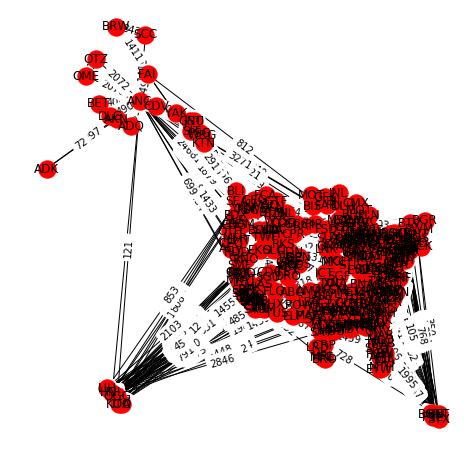

In [4]:
#Demo 1 continued
gf.describe()
gf.draw_network_attr(with_pos = True)

In [5]:
# Demo 2 one can use sub_graph_flow to generate sub_graph_flow
# bug 03/11/07,11/4/07,03/09/08,11/02/08 can not be between start_time and end_time
sub_nodes=set(list(gf.G.nodes)[:4])
sub_gf=gf.sub_graph_flow(start_time = '2007-02-01 01:00:00',end_time = '2007-03-01 01:00:00',sub_nodes = sub_nodes )

(673, 4)
(673, 4)


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


dt : 1:00:00
start time: 2007-02-01 01:00:00-08:00
start time: 2007-03-01 01:00:00-08:00
All data frame has shape: (673, 4)


ABE  ATL  BWI  CLE
2007-02-01 01:00:00-08:00    0    0    0    0
2007-02-01 02:00:00-08:00    0    0    0    0
2007-02-01 03:00:00-08:00    2    0    3    1

Year  Month  DayofMonth  DepTime  ArrTime  ArrDelay  DepDelay Origin  \
624022  2007      2           2      703      823        -2        -2    BWI   
624023  2007      2           2     1328     1445         0        -2    BWI   
624024  2007      2           2     2255        9       154       155    BWI   

       Dest  AirTime  TaxiIn  TaxiOut                 AbsDepTime  \
624022  CLE       57       6       17  2007-02-02 04:03:00-08:00   
624023  CLE       61       6       10  2007-02-02 10:28:00-08:00   
624024  CLE       60       6        8  2007-02-02 19:55:00-08:00   

                       AbsArrTime  
624022  2007-02-02 05:23:00-08:00  
624023  2007-02-02 11:45:00-08:00  
624024  2007-02-02 21:09:00-08:00

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


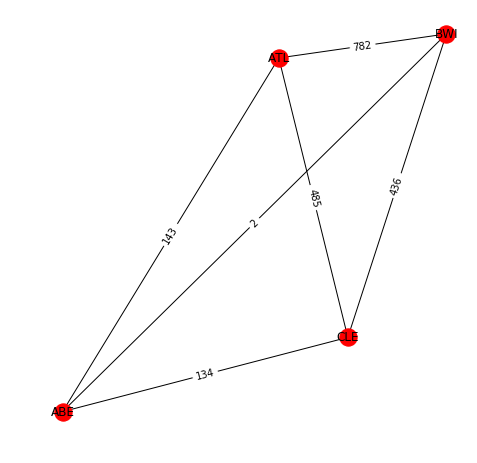

In [6]:
sub_gf.describe()
sub_gf.draw_network_attr(with_pos = False)

==============edges generated:  -0.0009975433349609375
===============pre_data generated:  -1.4002556800842285
(673, 311)
(673, 311)
dt : 1:00:00
start time: 2007-02-01 01:00:00-08:00
start time: 2007-03-01 01:00:00-08:00
All data frame has shape: (673, 311)


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


ABE  ABI  ABQ  ABY  ACK  ACT  ACV  ACY  ADK  ADQ  \
2007-02-01 01:00:00-08:00    0    0    0    0    0    0    0    0    0    0   
2007-02-01 02:00:00-08:00    1    0    0    0    0    0    0    0    0    0   
2007-02-01 03:00:00-08:00    4    1    0    0    0    0    0    1    0    0   

                           ...  TYR  TYS  VLD  VPS  WRG  WYS  XNA  YAK  YKM  \
2007-02-01 01:00:00-08:00  ...    0    0    0    0    0    0    0    0    0   
2007-02-01 02:00:00-08:00  ...    0    3    0    0    0    0    0    0    0   
2007-02-01 03:00:00-08:00  ...    0    4    1    0    0    0    2    0    0   

                           YUM  
2007-02-01 01:00:00-08:00    0  
2007-02-01 02:00:00-08:00    0  
2007-02-01 03:00:00-08:00    0  

[3 rows x 311 columns]

Year  Month  DayofMonth  DepTime  ArrTime  ArrDelay  DepDelay Origin  \
154545  2007      1          31     2355      100       -14         0    LAS   
154550  2007      1          31     2359      100       -12         0    LAS   
154554  2007      1          31     2359      115       -11         0    LAS   

       Dest  AirTime  TaxiIn  TaxiOut                 AbsDepTime  \
154545  FAT       42       8       15  2007-01-31 23:55:00-08:00   
154550  PSP       43       8       10  2007-01-31 23:59:00-08:00   
154554  SJC       57       5       14  2007-01-31 23:59:00-08:00   

                       AbsArrTime  
154545  2007-02-01 01:00:00-08:00  
154550  2007-02-01 01:00:00-08:00  
154554  2007-02-01 01:15:00-08:00

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


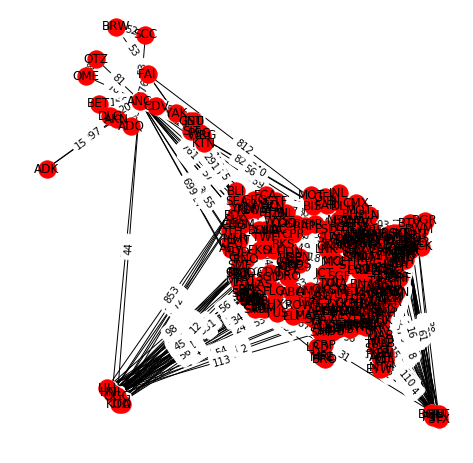

In [7]:
# Demo 3 if sub_nodes is none,edges is None,then choose all_nodes,. ~ 4min
# bug 03/11/07,11/4/07,03/09/08,11/02/08 can not be between start_time and end_time
sub_gf=gf.sub_graph_flow('2007-02-01 01:00:00','2007-03-01 01:00:00',sub_nodes = None)
sub_gf.describe()
sub_gf.draw_network_attr(with_pos = True)

(673, 91)
(673, 91)
dt : 1:00:00
start time: 2007-02-01 01:00:00-08:00
start time: 2007-03-01 01:00:00-08:00
All data frame has shape: (673, 91)


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


ABQ  ANC  ASE  ATL  AUS  BDL  BFL  BNA  BOI  BOS  \
2007-02-01 01:00:00-08:00    0    0    0    1    0    0    0    0    0    0   
2007-02-01 02:00:00-08:00    0    0    0    0    0    0    0    0    0    0   
2007-02-01 03:00:00-08:00    0    0    0    1    0    0    0    0    0    3   

                           ...  SLC  SMF  SMX  SNA  STL  TPA  TUL  TUS  XNA  \
2007-02-01 01:00:00-08:00  ...    0    0    0    0    0    0    0    0    0   
2007-02-01 02:00:00-08:00  ...    0    0    0    0    0    1    0    0    0   
2007-02-01 03:00:00-08:00  ...    0    0    0    0    0    0    0    0    0   

                           YUM  
2007-02-01 01:00:00-08:00    0  
2007-02-01 02:00:00-08:00    0  
2007-02-01 03:00:00-08:00    0  

[3 rows x 91 columns]

Year  Month  DayofMonth  DepTime  ArrTime  ArrDelay  DepDelay Origin  \
225099  2007      1          31     2319      722        66        69    LAX   
225126  2007      1          31     2320      729       -11       -10    LAX   
225514  2007      1          31     2135      422       -24        -5    OGG   

       Dest  AirTime  TaxiIn  TaxiOut                 AbsDepTime  \
225099  JFK      278       9       16  2007-01-31 23:19:00-08:00   
225126  JFK      284       8       17  2007-01-31 23:20:00-08:00   
225514  LAX      272       2       13  2007-01-31 23:35:00-08:00   

                       AbsArrTime  
225099  2007-02-01 04:22:00-08:00  
225126  2007-02-01 04:29:00-08:00  
225514  2007-02-01 04:22:00-08:00

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


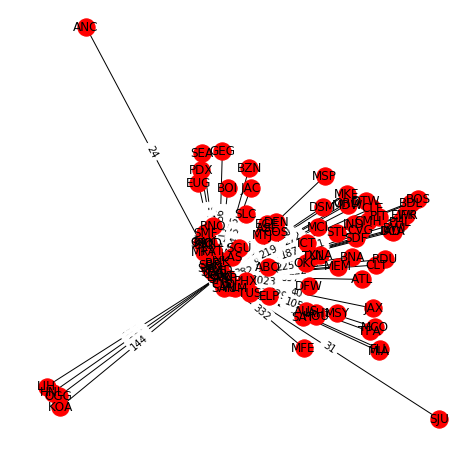

In [8]:
# Demo 4 if sub_nodes is none,edges aregiven, then generate a subGraphFLow with edges given. ~ 3 min
# bug 03/11/07,11/4/07,03/09/08,11/02/08 can not be between start_time and end_time
sub_gf = gf.sub_graph_flow('2007-02-01 01:00:00','2007-03-01 01:00:00',sub_nodes = None,
                           edges =  (set(gf.G.out_edges('LAX'))|set(gf.G.in_edges('LAX'))))
sub_gf.describe()
sub_gf.draw_network_attr(with_pos = True)

## 2 Visualization for the GraphFlow

In [9]:
def analysis_2(sub_nodes,st_time,end_time,airport):
    sub_gf=gf.sub_graph_flow(st_time,end_time,sub_nodes)
    sub_gf.describe()
    sub_gf.draw_network_attr(with_pos = False)
    airports = list(sub_gf.G.succ[airport])
    
    
    lax_pre_data = sub_gf.pre_data[sub_gf.pre_data.Dest == airport]
    lax_arr = pd.DataFrame(index = pd.to_datetime(lax_pre_data.AbsArrTime), columns = ['To'+ airport],data = 1)

    lax_arrdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.ArrDelay >15].AbsArrTime), columns = ['ArrDTo' +airport],data = 1)

    lax_arrdelay_not_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay >15) &
                                            (lax_pre_data.DepDelay <15)].AbsArrTime), columns = ['ArrD&DepNDTo' +airport],data = 1)

    lax_arrnotdelay_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay <15) &
                                            (lax_pre_data.DepDelay >15)].AbsArrTime), columns = ['DepD&NArrDTo' +airport],data = 1)

    lax_df = pd.concat([lax_arr, lax_arrdelay,lax_arrdelay_not_depdelay,lax_arrnotdelay_depdelay],sort = False).sort_index()
    
    dt = sub_gf.dt
    orgin_dfss = list(chain.from_iterable([orgin_dfs_gen(orgin_airport,lax_pre_data) for orgin_airport in airports ]))
    origin_lax_ts = pd.concat(orgin_dfss + [lax_df],sort = False).sort_index().groupby(pd.Grouper( freq= dt)).count()

    origin_lax_ts['Naive_1'] = origin_lax_ts[['EstArr'+airport for airport in airports ]].sum(axis = 1)

    origin_lax_ts['Naive_2_cheat']=origin_lax_ts['Naive_1'] + origin_lax_ts['ArrD&DepNDTo'+airport]-origin_lax_ts['DepD&NArrDTo'+airport]

    origin_lax_ts.iloc[:,:-2].plot(subplots=True, legend=True,figsize=(16,origin_lax_ts.shape[1]))
    #display(origin_lax_ts.head())
    origin_lax_ts[['ArrDTo'+airport,'Naive_1']].plot(subplots=False, legend=True,figsize=(16,2))
    print('mean error for Naive_1:',abs(origin_lax_ts['ArrDTo'+airport]-origin_lax_ts['Naive_1']).mean())
    origin_lax_ts[['ArrDTo'+airport,'Naive_2_cheat']].plot(subplots=False, legend=True,figsize=(16,2))
    print('mean error for Naive_2_cheat:',abs(origin_lax_ts['ArrDTo'+airport]-origin_lax_ts['Naive_2_cheat']).mean())
    return lax_pre_data , orgin_dfss , origin_lax_ts

def orgin_dfs_gen(orgin_airport,lax_pre_data):
    origin_lax_pre_data = lax_pre_data[lax_pre_data.Origin == orgin_airport]
    ArrIndexDelay = pd.DataFrame(index = pd.to_datetime(
        origin_lax_pre_data.AbsArrTime[origin_lax_pre_data.DepDelay >15]),
                                                     columns = ['ArrIdxDD'+orgin_airport],data = 1).sort_index()
    #display(ArrIndexDelay.head())

    DepIndex = pd.DataFrame(index = pd.to_datetime(origin_lax_pre_data.AbsDepTime),
                                                columns = ['DepIdx'+orgin_airport],data = 1).sort_index()
    #display(DepIndex.head())

    DepIndexDepDelay = pd.DataFrame(index = pd.to_datetime(origin_lax_pre_data.AbsDepTime[origin_lax_pre_data.DepDelay >15]),
                                                        columns = ['DepIdxDD'+orgin_airport],data = 1).sort_index()
    #display(DepIndexDepDelay.head())

    mean_delay = origin_lax_pre_data[origin_lax_pre_data.DepDelay >15][['AirTime','TaxiIn','TaxiOut']].sum(axis = 1).mean()
    shift_dt = timedelta(seconds = round(mean_delay)*60) 
    shift_dt
    EstArrIndex =pd.DataFrame(index = DepIndexDepDelay.index.shift(periods = 1,freq = shift_dt), columns = ['EstArr'+orgin_airport],data = 1) 
    #display(EstArrIndex.head())
    
    orgin_dfs = [DepIndex,DepIndexDepDelay,ArrIndexDelay,EstArrIndex]
    return orgin_dfs

In [53]:
def analysis_4(st_time , end_time , airport , threshhold_key = "mean"):
    sub_gf = gf.sub_graph_flow(st_time,end_time,sub_nodes = None,
                           edges =  (set(gf.G.out_edges(airport))|set(gf.G.in_edges(airport))))
    
    sub_gf.describe()
    sub_gf.draw_network_attr(with_pos = True)
    
    sns.set_style('darkgrid')
    airport_weights = list(nx.get_edge_attributes(sub_gf.G,'weight').values())
    sns.distplot(airport_weights,kde=False)
    
    if threshhold_key is None:
        threshhold = 0
    elif threshhold_key == 'mean':
        threshhold = np.mean(np.asarray(airport_weights))
    elif threshhold_key == 'median':
        threshhold = np.median(np.asarray(airport_weights))
    elif threshhold_key == 'max':
        threshhold = np.max(np.asarray(airport_weights))
        
        

    
    # threshhold are used here
    new_edges = [x for x, y in dict(nx.get_edge_attributes(sub_gf.G,'weight')).items() if y>=threshhold]
    reverse_edges = [swap(x) for x  in new_edges]
    sub_gf_2 = sub_gf.sub_graph_flow(edges = new_edges + reverse_edges)
    
    print('threshhold: ',threshhold)
    plt.show()
    
    sub_gf_2.describe()
    sub_gf_2.draw_network_attr(with_pos =True)
    plt.show()
    
    dt = sub_gf_2.dt

    lax_pre_data = sub_gf_2.pre_data[sub_gf_2.pre_data.Dest == airport]
    lax_arr = pd.DataFrame(index = pd.to_datetime(lax_pre_data.AbsArrTime), columns = ['To'+ airport],data = 1)

    lax_arrdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.ArrDelay >15].AbsArrTime),
                                 columns = ['ArrDTo' +airport],data = 1)

    lax_not_arrdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.ArrDelay <15].AbsArrTime),
                                 columns = ['NArrDTo' +airport],data = 1)

    lax_depdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.DepDelay >15].AbsArrTime),
                                 columns = ['DepDTo' +airport],data = 1)

    lax_not_depdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.DepDelay <15].AbsArrTime),
                                 columns = ['NDepDTo' +airport],data = 1)

    lax_arrdelay_not_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay >15) & (lax_pre_data.DepDelay <15)].AbsArrTime),
        columns = ['ArrD&NDepDTo' +airport],data = 1)

    lax_arrdelay_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay >15) & (lax_pre_data.DepDelay >15)].AbsArrTime),
        columns = ['ArrD&DepDTo' +airport],data = 1)

    lax_not_arrdelay_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay <15) & (lax_pre_data.DepDelay >15)].AbsArrTime),
        columns = ['NArrD&DepDTo' +airport],data = 1)

    lax_not_arrndelay_not_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay <15) & (lax_pre_data.DepDelay <15)].AbsArrTime),
        columns = ['NDepD&NArrDTo' +airport],data = 1)

    lax_df = pd.concat([lax_arr, lax_arrdelay,lax_not_arrdelay,lax_depdelay,lax_not_depdelay,
                       lax_arrdelay_not_depdelay,lax_arrdelay_depdelay,
                       lax_not_arrdelay_depdelay,lax_not_arrndelay_not_depdelay],sort = False).sort_index()

    origin_lax_ts = lax_df.groupby(pd.Grouper( freq= dt)).count()

    origin_lax_ts_by_day = origin_lax_ts.groupby(pd.Grouper( freq= 'D')).sum()

    origin_lax_ts_by_day_ratio = pd.DataFrame()

    origin_lax_ts_by_day_ratio['NDepDToArrD'+airport]=origin_lax_ts_by_day.apply(lambda x : x['ArrD&NDepDTo' +airport] / (x['NDepDTo' +airport]),
                                                             axis = 1)
    origin_lax_ts_by_day_ratio['DepDToArrD'+airport] = origin_lax_ts_by_day.apply(lambda x : x['ArrD&DepDTo' +airport] / (x['DepDTo' +airport]),
                                                              axis = 1)


    origin_lax_ts.plot(subplots=True, legend=True,figsize=(16,origin_lax_ts.shape[1]))
    origin_lax_ts_by_day_ratio.plot(subplots=True, legend=True,figsize=(16,origin_lax_ts_by_day_ratio.shape[1]))
    
    return lax_df , origin_lax_ts , origin_lax_ts_by_day_ratio

In [96]:
# Analysis 5
# bug 03/11/07,11/4/07,03/09/08,11/02/08 can not be between start_time and end_time
def analysis_5(start_time, end_time,airport , init_hour = '13:00:00'):
    sub_gf = gf.sub_graph_flow(start_time,end_time,sub_nodes = None,
                           edges =  set(gf.G.out_edges(airport)))# ~2min
    sub_gf.describe()
    sub_gf.draw_network_attr(with_pos = True)
    dt = sub_gf.dt

    lax_pre_data = sub_gf.pre_data
    lax_dep = pd.DataFrame(index = pd.to_datetime(lax_pre_data.AbsDepTime), columns = ['Fr'+ airport],data = 1)

    lax_arrdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.ArrDelay >15].AbsDepTime),
                                 columns = ['ArrDFr' +airport],data = 1)

    lax_not_arrdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.ArrDelay <15].AbsDepTime),
                                 columns = ['NArrDFr' +airport],data = 1)

    lax_depdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.DepDelay >15].AbsDepTime),
                                 columns = ['DepDFr' +airport],data = 1)

    lax_not_depdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.DepDelay <15].AbsDepTime),
                                 columns = ['NDepDFr' +airport],data = 1)

    lax_arrdelay_not_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay >15) & (lax_pre_data.DepDelay <15)].AbsDepTime),
        columns = ['ArrD&NDepDFr' +airport],data = 1)

    lax_arrdelay_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay >15) & (lax_pre_data.DepDelay >15)].AbsDepTime),
        columns = ['ArrD&DepDFr' +airport],data = 1)

    lax_not_arrdelay_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay <15) & (lax_pre_data.DepDelay >15)].AbsDepTime),
        columns = ['NArrD&DepDFr' +airport],data = 1)

    lax_not_arrndelay_not_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay <15) & (lax_pre_data.DepDelay <15)].AbsDepTime),
        columns = ['NDepD&NArrDFr' +airport],data = 1)

    lax_df = pd.concat([lax_dep, lax_arrdelay,lax_not_arrdelay,lax_depdelay,lax_not_depdelay,
                       lax_arrdelay_not_depdelay,lax_arrdelay_depdelay,
                       lax_not_arrdelay_depdelay,lax_not_arrndelay_not_depdelay],sort = False).sort_index()

    origin_lax_ts = lax_df.groupby(pd.Grouper( freq= dt)).count()

    origin_lax_ts_by_day = origin_lax_ts.groupby(pd.Grouper( freq= 'D')).sum()

    origin_lax_ts.plot(subplots=True, legend=True,figsize=(16,origin_lax_ts.shape[1]));


    sample_lax_ts = origin_lax_ts.loc[pd.date_range(start= start_time[:11]+init_hour,end = end_time,freq='D',tz=timezone('America/Los_Angeles'))]
    sample_lax_ts.plot(subplots=True, legend=True,figsize=(16,9))

    for column in sample_lax_ts.columns:
        plot_pacf(sample_lax_ts[column] , ax= plt.subplot(1, 3, 1),title = column,lags = 40)
        
        sns.distplot(sample_lax_ts[column],kde=True,ax = plt.subplot(1, 3, 2) )
        sm.qqplot(sample_lax_ts[column], stats.norm, fit=True, line='45',ax = plt.subplot(1, 3, 3))
        plt.show()
        
    return sub_gf,lax_df,origin_lax_ts,sample_lax_ts



In [57]:
def analysis_6(st_time , end_time , airport , origin):#weak
    sub_gf = gf.sub_graph_flow(st_time,end_time,sub_nodes = None,
                           edges =  [(airport , origin),(origin ,airport )])
    
    sub_gf.describe()
    sub_gf.draw_network_attr(with_pos = True)
    
#     sns.set_style('darkgrid')
#     airport_weights = list(nx.get_edge_attributes(sub_gf.G,'weight').values())
#     sns.distplot(airport_weights,kde=False)
    
#     if threshhold_key is None:
#         threshhold = 0
#     elif threshhold_key == 'mean':
#         threshhold = np.mean(np.asarray(airport_weights))
#     elif threshhold_key == 'median':
#         threshhold = np.median(np.asarray(airport_weights))
#     elif threshhold_key == 'max':
#         threshhold = np.max(np.asarray(airport_weights))
        
        

    
#     # threshhold are used here
#     new_edges = [x for x, y in dict(nx.get_edge_attributes(sub_gf.G,'weight')).items() if y>=threshhold]
#     reverse_edges = [swap(x) for x  in new_edges]
#     sub_gf_2 = sub_gf.sub_graph_flow(edges = new_edges + reverse_edges)
    
    
#     print('threshhold: ',threshhold)
#     plt.show()
                               
                               
    
#     sub_gf_2.describe()
#     sub_gf_2.draw_network_attr(with_pos =True)
#     plt.show()
    sub_gf_2 = sub_gf
    
    dt = sub_gf_2.dt

    lax_pre_data = sub_gf_2.pre_data[sub_gf_2.pre_data.Dest == airport]
    lax_arr = pd.DataFrame(index = pd.to_datetime(lax_pre_data.AbsArrTime), columns = ['To'+ airport],data = 1)

    lax_arrdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.ArrDelay >15].AbsArrTime),
                                 columns = ['ArrDTo' +airport],data = 1)

    lax_not_arrdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.ArrDelay <15].AbsArrTime),
                                 columns = ['NArrDTo' +airport],data = 1)

    lax_depdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.DepDelay >15].AbsArrTime),
                                 columns = ['DepDTo' +airport],data = 1)

    lax_not_depdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.DepDelay <15].AbsArrTime),
                                 columns = ['NDepDTo' +airport],data = 1)

    lax_arrdelay_not_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay >15) & (lax_pre_data.DepDelay <15)].AbsArrTime),
        columns = ['ArrD&NDepDTo' +airport],data = 1)

    lax_arrdelay_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay >15) & (lax_pre_data.DepDelay >15)].AbsArrTime),
        columns = ['ArrD&DepDTo' +airport],data = 1)

    lax_not_arrdelay_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay <15) & (lax_pre_data.DepDelay >15)].AbsArrTime),
        columns = ['NArrD&DepDTo' +airport],data = 1)

    lax_not_arrndelay_not_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay <15) & (lax_pre_data.DepDelay <15)].AbsArrTime),
        columns = ['NDepD&NArrDTo' +airport],data = 1)

    lax_df = pd.concat([lax_arr, lax_arrdelay,lax_not_arrdelay,lax_depdelay,lax_not_depdelay,
                       lax_arrdelay_not_depdelay,lax_arrdelay_depdelay,
                       lax_not_arrdelay_depdelay,lax_not_arrndelay_not_depdelay],sort = False).sort_index()

    origin_lax_ts = lax_df.groupby(pd.Grouper( freq= dt)).count()

    origin_lax_ts_by_day = origin_lax_ts.groupby(pd.Grouper( freq= 'D')).sum()

    origin_lax_ts_by_day_ratio = pd.DataFrame()

    origin_lax_ts_by_day_ratio['NDepDToArrD'+airport]=origin_lax_ts_by_day.apply(lambda x : x['ArrD&NDepDTo' +airport] / (x['NDepDTo' +airport]),
                                                             axis = 1)
    origin_lax_ts_by_day_ratio['DepDToArrD'+airport] = origin_lax_ts_by_day.apply(lambda x : x['ArrD&DepDTo' +airport] / (x['DepDTo' +airport]),
                                                              axis = 1)


    origin_lax_ts.plot(subplots=True, legend=True,figsize=(16,origin_lax_ts.shape[1]))
    origin_lax_ts_by_day_ratio.plot(subplots=True, legend=True,figsize=(16,origin_lax_ts_by_day_ratio.shape[1]))
    
    return lax_df , origin_lax_ts , origin_lax_ts_by_day_ratio

In [157]:
# Analysis 5
# bug 03/11/07,11/4/07,03/09/08,11/02/08 can not be between start_time and end_time
def analysis_7(start_time, end_time,airport,init_hours = ['11:00:00']):
    sub_gf = gf.sub_graph_flow(start_time,end_time,sub_nodes = None,
                           edges =  set(gf.G.out_edges(airport)))# ~2min
    sub_gf.describe()
    sub_gf.draw_network_attr(with_pos = True)
    dt = sub_gf.dt

    lax_pre_data = sub_gf.pre_data
    lax_dep = pd.DataFrame(index = pd.to_datetime(lax_pre_data.AbsDepTime), columns = ['Fr'+ airport],data = 1)

    lax_arrdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.ArrDelay >15].AbsDepTime),
                                 columns = ['ArrDFr' +airport],data = 1)

    lax_not_arrdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.ArrDelay <15].AbsDepTime),
                                 columns = ['NArrDFr' +airport],data = 1)

    lax_depdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.DepDelay >15].AbsDepTime),
                                 columns = ['DepDFr' +airport],data = 1)

    lax_not_depdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.DepDelay <15].AbsDepTime),
                                 columns = ['NDepDFr' +airport],data = 1)

    lax_arrdelay_not_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay >15) & (lax_pre_data.DepDelay <15)].AbsDepTime),
        columns = ['ArrD&NDepDFr' +airport],data = 1)

    lax_arrdelay_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay >15) & (lax_pre_data.DepDelay >15)].AbsDepTime),
        columns = ['ArrD&DepDFr' +airport],data = 1)

    lax_not_arrdelay_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay <15) & (lax_pre_data.DepDelay >15)].AbsDepTime),
        columns = ['NArrD&DepDFr' +airport],data = 1)

    lax_not_arrndelay_not_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay <15) & (lax_pre_data.DepDelay <15)].AbsDepTime),
        columns = ['NDepD&NArrDFr' +airport],data = 1)

    lax_df = pd.concat([lax_dep, lax_arrdelay,lax_not_arrdelay,lax_depdelay,lax_not_depdelay,
                       lax_arrdelay_not_depdelay,lax_arrdelay_depdelay,
                       lax_not_arrdelay_depdelay,lax_not_arrndelay_not_depdelay],sort = False).sort_index()

    origin_lax_ts = lax_df.groupby(pd.Grouper( freq= dt)).count()

    origin_lax_ts_by_day = origin_lax_ts.groupby(pd.Grouper( freq= 'D')).sum()

    origin_lax_ts.plot(subplots=True, legend=True,figsize=(16,origin_lax_ts.shape[1]));
    
    hist = pd.DataFrame()
    for init_hour in init_hours:
        print("fit for "+init_hour)
        sample_lax_ts = origin_lax_ts.loc[pd.date_range(start= start_time[:11]+init_hour,end = end_time,freq='D',tz=timezone('America/Los_Angeles'))]
        sample_lax_ts.plot(subplots=True, legend=True,figsize=(16,9))

        column = 'DepDFr' +airport
        data = sample_lax_ts[column].interpolate(method ='linear', limit_direction ='both') 
        plot_pacf(data , ax= plt.subplot(1, 4, 1),title = column,lags = 40)

        sns.distplot(data,kde=True,ax = plt.subplot(1, 4, 2) )
        sm.qqplot(data, stats.norm, fit=True, line='45',ax = plt.subplot(1, 4, 3))
        stats.probplot(data, dist='poisson', sparams=(2.5,), plot = plt.subplot(1, 4, 4))
        hist[init_hour] = data.describe().rename(init_hour)
        plt.show()
        
    return sub_gf,lax_df,origin_lax_ts,hist

(337, 4)
(337, 4)
dt : 1:00:00
start time: 2007-02-01 01:00:00-08:00
start time: 2007-02-15 01:00:00-08:00
All data frame has shape: (337, 4)


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


HNL  LAS  LAX  OGG
2007-02-01 01:00:00-08:00    3    0    0    0
2007-02-01 02:00:00-08:00    1    1    0    1
2007-02-01 03:00:00-08:00    0    0    0    0

Year  Month  DayofMonth  DepTime  ArrTime  ArrDelay  DepDelay Origin  \
225514  2007      1          31     2135      422       -24        -5    OGG   
226633  2007      1          31     2126      418       -28        -5    HNL   
379685  2007      1          31     2246      620        -5        -9    HNL   

       Dest  AirTime  TaxiIn  TaxiOut                 AbsDepTime  \
225514  LAX      272       2       13  2007-01-31 23:35:00-08:00   
226633  LAX      274       5       13  2007-01-31 23:26:00-08:00   
379685  LAS      432       8       14  2007-02-01 00:46:00-08:00   

                       AbsArrTime  
225514  2007-02-01 04:22:00-08:00  
226633  2007-02-01 04:18:00-08:00  
379685  2007-02-01 06:20:00-08:00

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


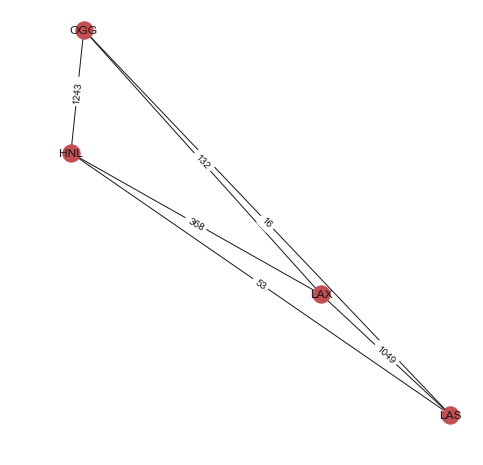

mean error for Naive_1: 0.27906976744186046
mean error for Naive_2_cheat: 0.18604651162790697


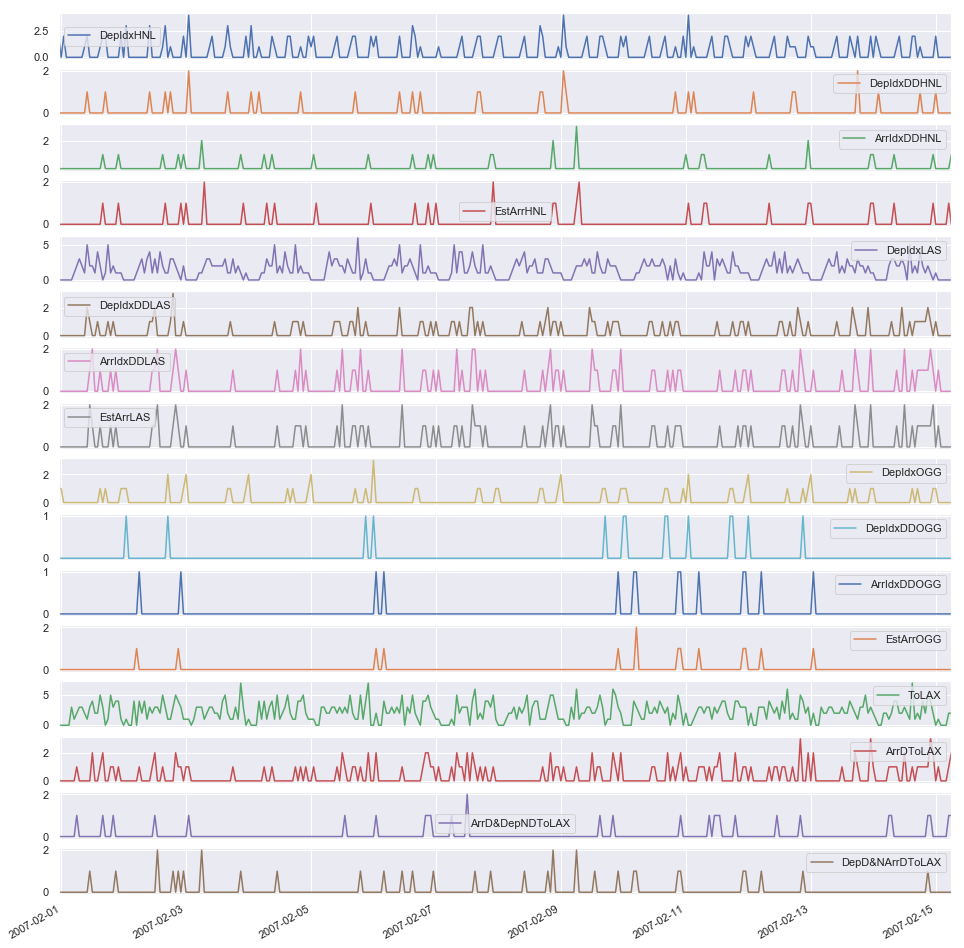

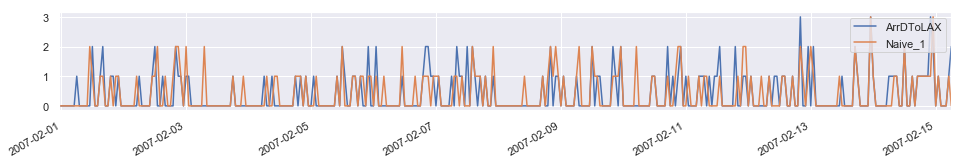

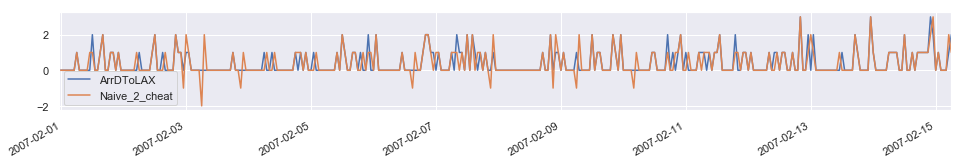

In [158]:
lax_pre_data_21 , orgin_dfss_21 , origin_lax_ts_21 = analysis_2(sub_nodes = set(['LAX','LAS','OGG','HNL']),
                                      st_time = '2007-02-01 01:00:00',
                                        end_time = '2007-02-15 01:00:00',
                                        airport = 'LAX')

(337, 8)
(337, 8)
dt : 1:00:00
start time: 2007-02-01 01:00:00-08:00
start time: 2007-02-15 01:00:00-08:00
All data frame has shape: (337, 8)


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


DEN  DFW  HNL  JFK  LAS  LAX  OGG  ORD
2007-02-01 01:00:00-08:00    0    0    4    0    1    3    0    0
2007-02-01 02:00:00-08:00    0    0    1    1    1    0    1    3
2007-02-01 03:00:00-08:00    0    2    0    7    0    0    0    7

Year  Month  DayofMonth  DepTime  ArrTime  ArrDelay  DepDelay Origin  \
224452  2007      1          31     1707      456       -14        -8    HNL   
225099  2007      1          31     2319      722        66        69    LAX   
225126  2007      1          31     2320      729       -11       -10    LAX   

       Dest  AirTime  TaxiIn  TaxiOut                 AbsDepTime  \
224452  ORD      452       5       12  2007-01-31 19:07:00-08:00   
225099  JFK      278       9       16  2007-01-31 23:19:00-08:00   
225126  JFK      284       8       17  2007-01-31 23:20:00-08:00   

                       AbsArrTime  
224452  2007-02-01 02:56:00-08:00  
225099  2007-02-01 04:22:00-08:00  
225126  2007-02-01 04:29:00-08:00

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


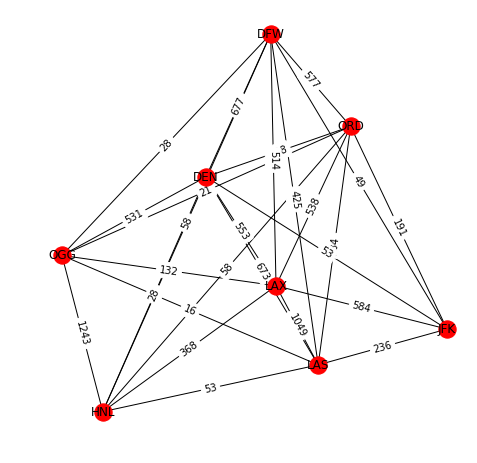

mean error for Naive_1: 0.7333333333333333
mean error for Naive_2_cheat: 0.4492753623188406


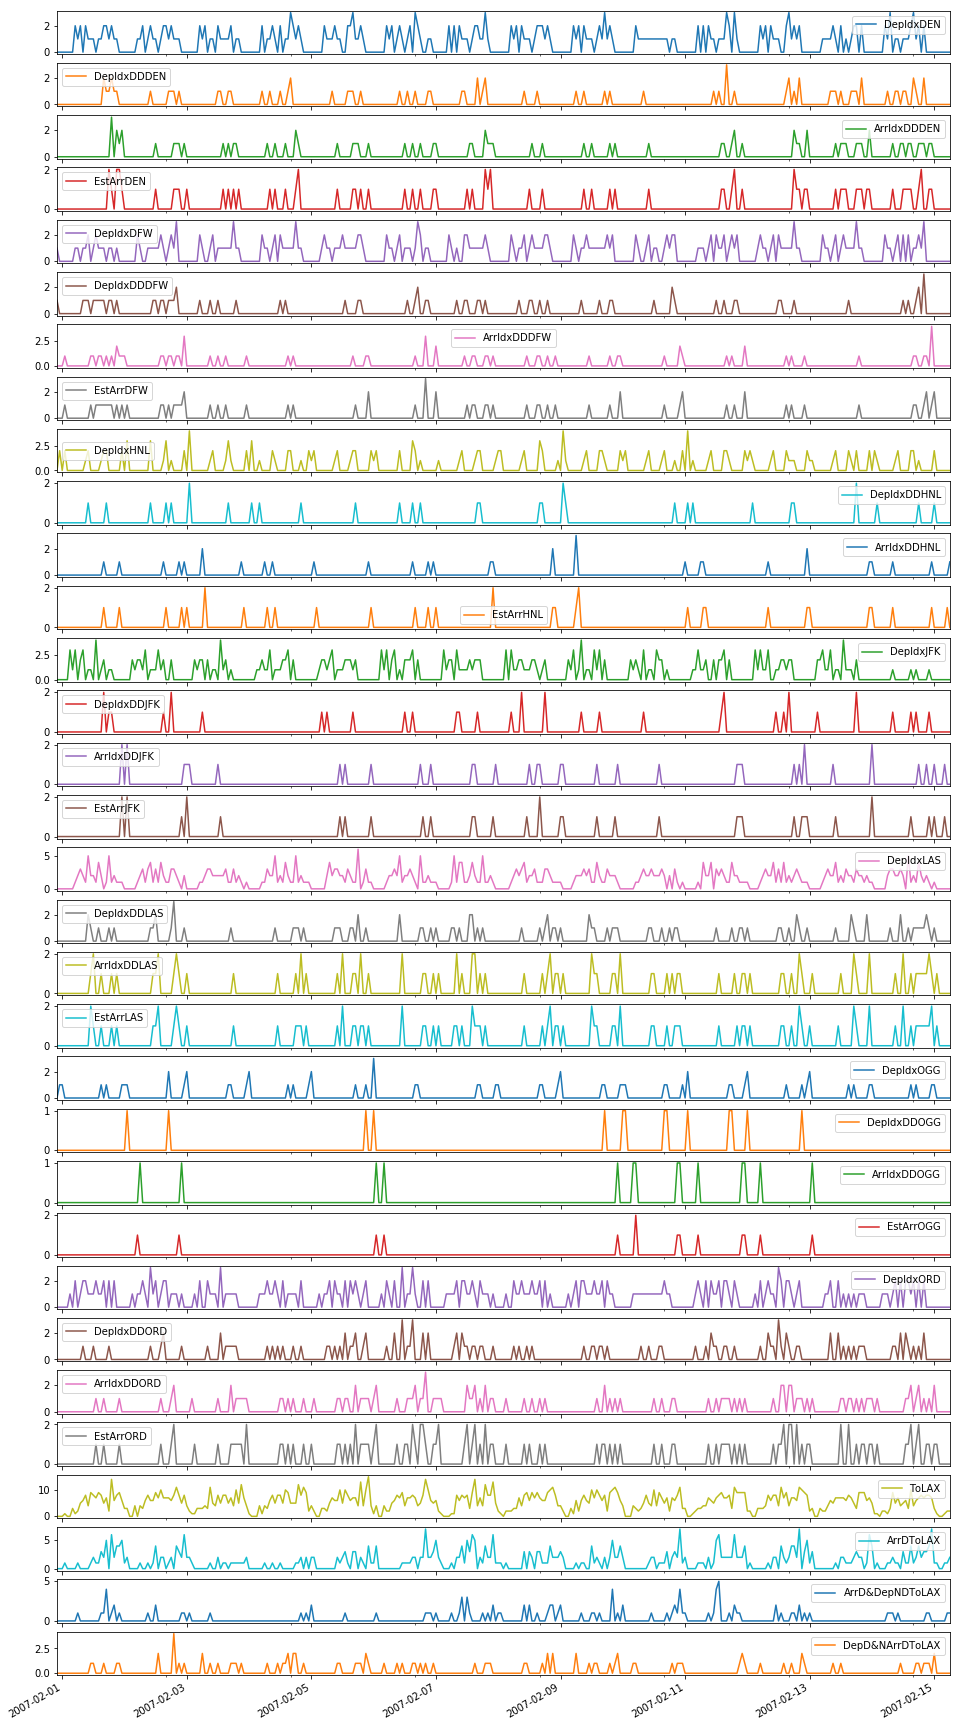

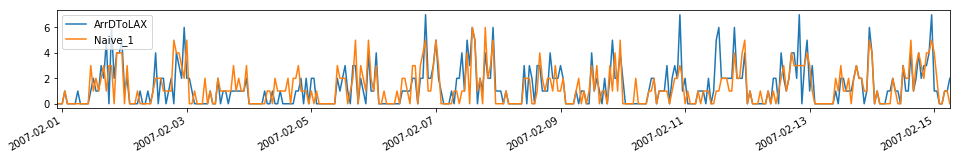

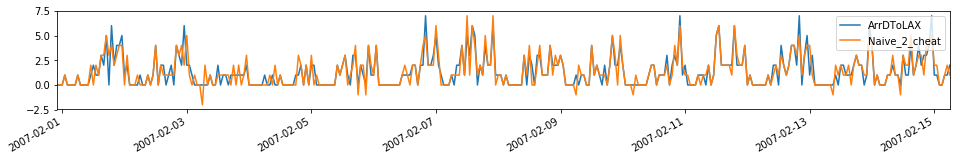

In [14]:
lax_pre_data_22 , orgin_dfss_22 , origin_lax_ts_22 = analysis_2(sub_nodes = set(['LAX','LAS','OGG','HNL','ORD','DFW','DEN','JFK']),
                                      st_time = '2007-02-01 01:00:00',
                                        end_time = '2007-02-15 01:00:00',
                                        airport = 'LAX')

(5137, 28)
(5137, 28)
threshhold:  1546.0777777777778


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


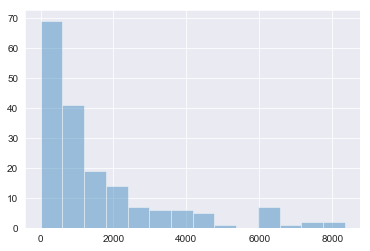

dt : 1:00:00
start time: 2007-04-01 01:00:00-07:00
start time: 2007-11-01 01:00:00-07:00
All data frame has shape: (5137, 28)


ATL  BOS  DEN  DFW  EWR  FAT  HNL  IAD  IAH  JFK  \
2007-04-01 01:00:00-07:00    0    0    0    0    0    0    3    0    0    0   
2007-04-01 02:00:00-07:00    1    0    0    0    0    0    1    1    0    0   
2007-04-01 03:00:00-07:00    1    2    0    2    2    0    0    2    0    2   

                           ...  PSP  SAN  SBA  SBP  SEA  SFO  SJC  SLC  SMF  \
2007-04-01 01:00:00-07:00  ...    0    0    0    0    0    0    0    0    0   
2007-04-01 02:00:00-07:00  ...    0    0    0    0    0    0    0    0    0   
2007-04-01 03:00:00-07:00  ...    0    0    0    0    0    0    0    0    0   

                           TUS  
2007-04-01 01:00:00-07:00    0  
2007-04-01 02:00:00-07:00    0  
2007-04-01 03:00:00-07:00    0  

[3 rows x 28 columns]

Year  Month  DayofMonth  DepTime  ArrTime  ArrDelay  DepDelay Origin  \
1420840  2007      3          31     2228      644        24        13    LAX   
1422178  2007      3          31     2037      429       -21         2    HNL   
1422552  2007      3          31     2218      623         8         8    LAX   

        Dest  AirTime  TaxiIn  TaxiOut                 AbsDepTime  \
1420840  JFK      283      10       23  2007-03-31 22:28:00-07:00   
1422178  LAX      273       3       16  2007-03-31 23:37:00-07:00   
1422552  EWR      274       8       23  2007-03-31 22:18:00-07:00   

                        AbsArrTime  
1420840  2007-04-01 03:44:00-07:00  
1422178  2007-04-01 04:29:00-07:00  
1422552  2007-04-01 03:23:00-07:00

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


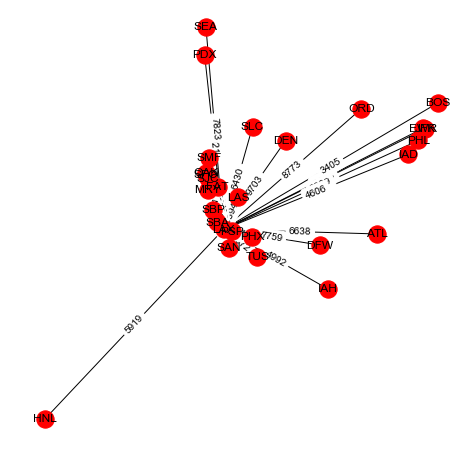

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


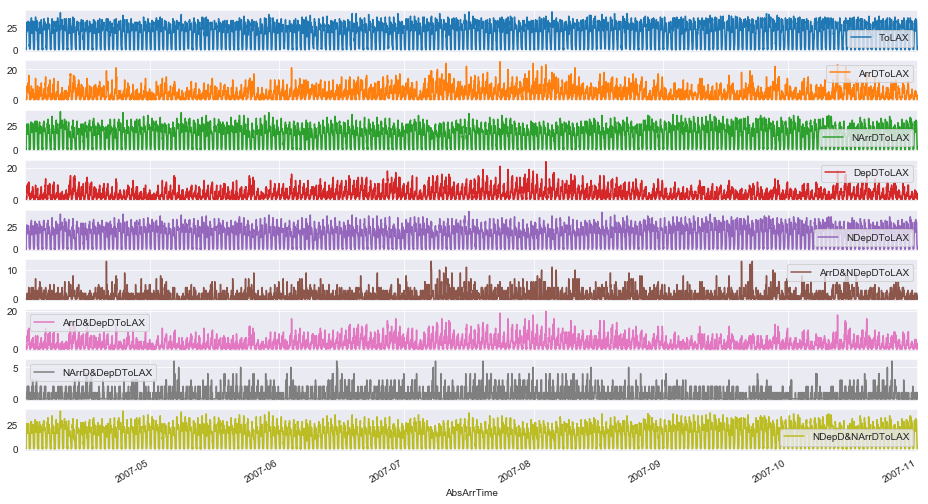

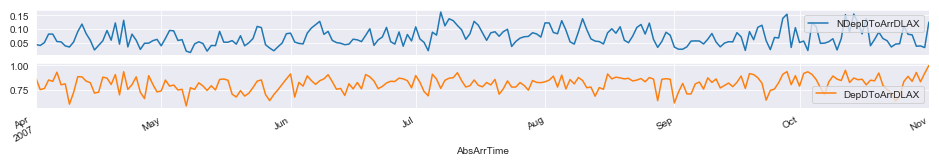

In [15]:
lax_df_41 , origin_lax_ts_41 , origin_lax_ts_by_day_ratio_41 = analysis_4(st_time = '2007-04-01 01:00:00',
                                                                 end_time = '2007-11-1 01:00:00',
                                                                 airport = 'LAX' ,
                                                                 threshhold_key = 'mean') # ~20min

(1465, 6)
(1465, 6)
threshhold:  450.68


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


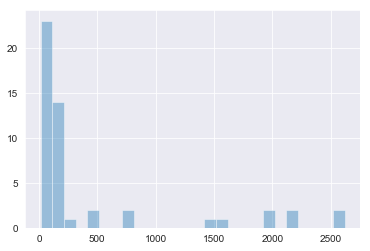

dt : 1:00:00
start time: 2007-04-01 01:00:00-07:00
start time: 2007-06-01 01:00:00-07:00
All data frame has shape: (1465, 6)


HNL  ITO  KOA  LAX  LIH  OGG
2007-04-01 01:00:00-07:00    4    0    1    0    0    2
2007-04-01 02:00:00-07:00    3    0    0    0    1    0
2007-04-01 03:00:00-07:00    0    0    0    0    0    0

Year  Month  DayofMonth  DepTime  ArrTime  ArrDelay  DepDelay Origin  \
1346215  2007      3          31     2140     2221        11        10    HNL   
1346218  2007      3          31     2320     2350        96       105    HNL   
1346228  2007      3          31     2150     2220        10        15    HNL   

        Dest  AirTime  TaxiIn  TaxiOut                 AbsDepTime  \
1346215  KOA       26       2       13  2007-04-01 00:40:00-07:00   
1346218  LIH       20       3        7  2007-04-01 02:20:00-07:00   
1346228  OGG       19       4        7  2007-04-01 00:50:00-07:00   

                        AbsArrTime  
1346215  2007-04-01 01:21:00-07:00  
1346218  2007-04-01 02:50:00-07:00  
1346228  2007-04-01 01:20:00-07:00

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


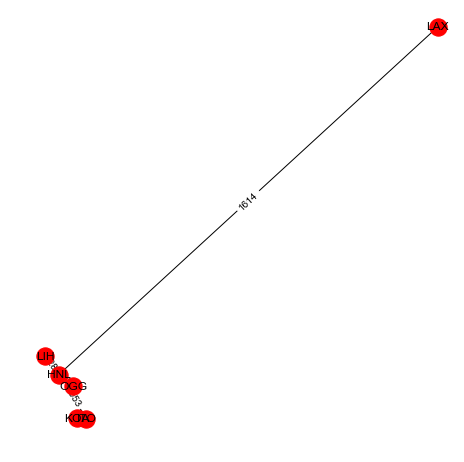

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


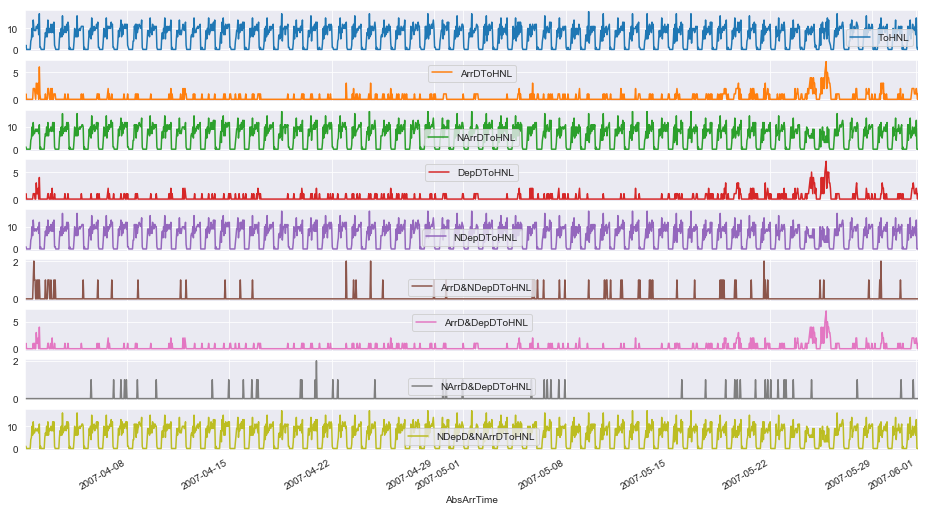

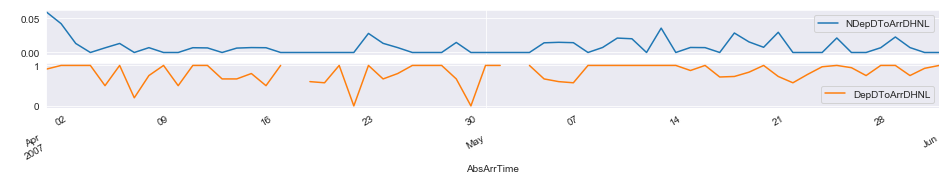

In [16]:
lax_df_42 , origin_lax_ts_42 , origin_lax_ts_by_day_ratio_42 = analysis_4(st_time = '2007-04-01 01:00:00',
                                                                   end_time = '2007-06-01 01:00:00',
                                                                   airport = 'HNL' , 
                                                                   threshhold_key = 'mean')# ~4min

(5137, 91)
(5137, 91)
dt : 1:00:00
start time: 2007-04-01 01:00:00-07:00
start time: 2007-11-01 01:00:00-07:00
All data frame has shape: (5137, 91)


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


ABQ  ANC  ASE  ATL  AUS  BDL  BFL  BNA  BOI  BOS  \
2007-04-01 01:00:00-07:00    0    0    0    0    0    0    0    0    0    0   
2007-04-01 02:00:00-07:00    0    0    0    1    0    0    0    0    0    0   
2007-04-01 03:00:00-07:00    0    0    0    1    0    0    0    0    0    1   

                           ...  SLC  SMF  SMX  SNA  STL  TPA  TUL  TUS  XNA  \
2007-04-01 01:00:00-07:00  ...    0    0    0    0    0    0    0    0    0   
2007-04-01 02:00:00-07:00  ...    0    0    0    0    0    1    0    0    0   
2007-04-01 03:00:00-07:00  ...    0    0    0    0    0    0    0    0    0   

                           YUM  
2007-04-01 01:00:00-07:00    0  
2007-04-01 02:00:00-07:00    0  
2007-04-01 03:00:00-07:00    0  

[3 rows x 91 columns]

Year  Month  DayofMonth  DepTime  ArrTime  ArrDelay  DepDelay Origin  \
1420840  2007      3          31     2228      644        24        13    LAX   
1422552  2007      3          31     2218      623         8         8    LAX   
1423278  2007      3          31     2336      518        16        21    LAX   

        Dest  AirTime  TaxiIn  TaxiOut                 AbsDepTime  \
1420840  JFK      283      10       23  2007-03-31 22:28:00-07:00   
1422552  EWR      274       8       23  2007-03-31 22:18:00-07:00   
1423278  ORD      201       6       15  2007-03-31 23:36:00-07:00   

                        AbsArrTime  
1420840  2007-04-01 03:44:00-07:00  
1422552  2007-04-01 03:23:00-07:00  
1423278  2007-04-01 03:18:00-07:00

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


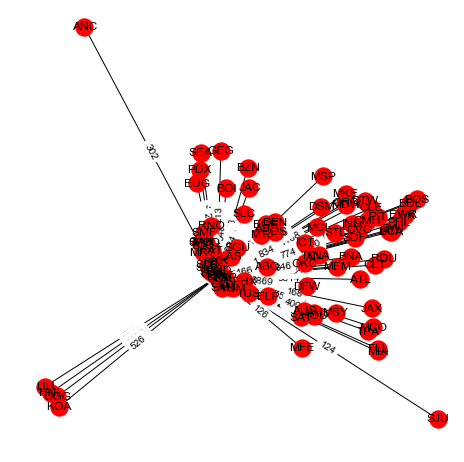

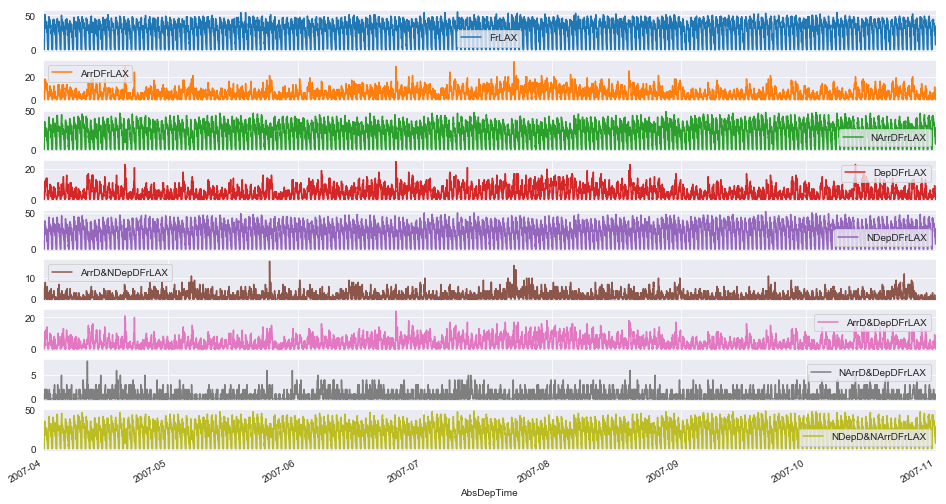

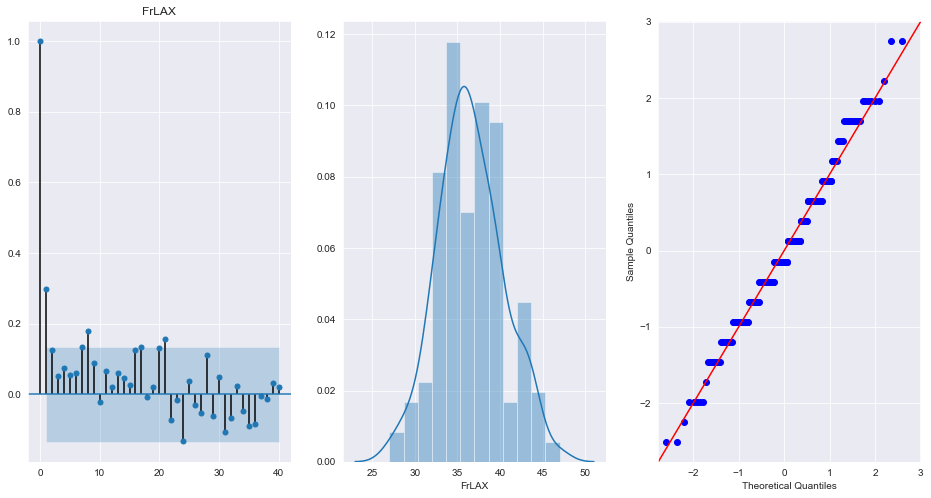

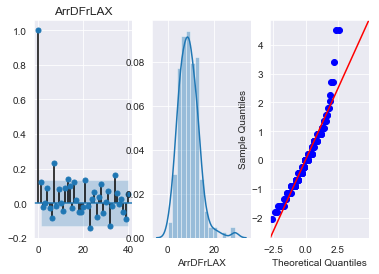

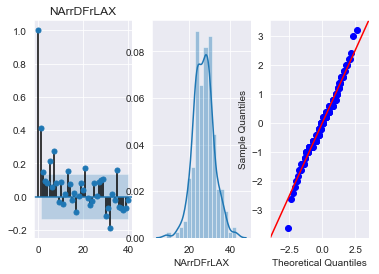

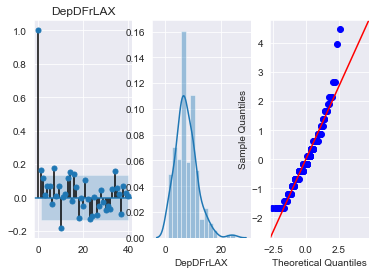

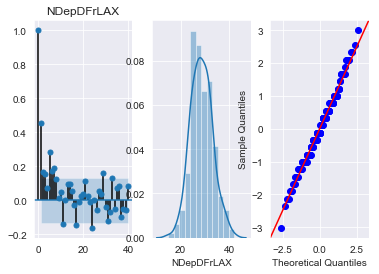

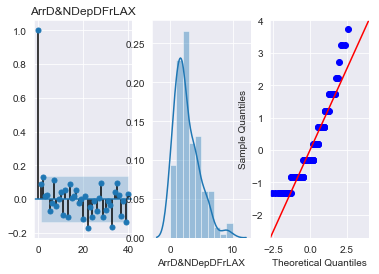

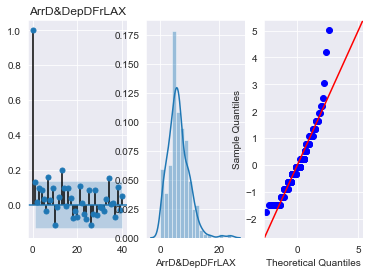

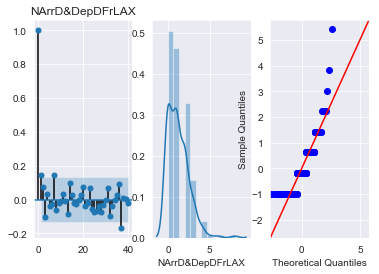

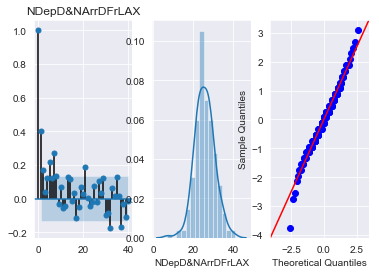

In [97]:
sub_gf_51,lax_df_51,origin_lax_ts_51,sample_lax_ts_51 = analysis_5(start_time = '2007-04-01 01:00:00',
                                                       end_time = '2007-11-01 01:00:00', 
                                                       airport = 'LAX' , 
                                                       init_hour = '13:00:00')

In [ ]:
sample_lax_ts_51

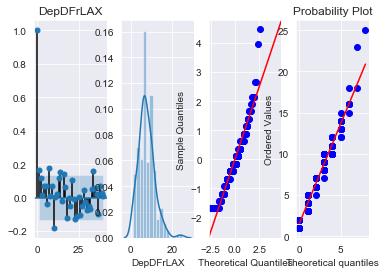

count    214.000000
mean       7.598131
std        3.901029
min        1.000000
25%        5.000000
50%        7.000000
75%       10.000000
max       25.000000
Name: s, dtype: float64

In [110]:
sample_lax_ts = sample_lax_ts_51
for column in ['DepDFrLAX']:
    plot_pacf(sample_lax_ts[column] , ax= plt.subplot(1, 4, 1),title = column,lags = 40)

    sns.distplot(sample_lax_ts[column],kde=True,ax = plt.subplot(1, 4, 2) )
    sm.qqplot(sample_lax_ts[column], stats.norm, fit=True, line='45',ax = plt.subplot(1, 4, 3))
    stats.probplot(sample_lax_ts[column], dist='poisson', sparams=(2.5,), plot = plt.subplot(1, 4, 4))
    plt.show()
sample_lax_ts['DepDFrLAX'].describe()


(721, 91)
(721, 91)
dt : 1:00:00
start time: 2007-04-01 01:00:00-07:00
start time: 2007-05-01 01:00:00-07:00
All data frame has shape: (721, 91)


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


ABQ  ANC  ASE  ATL  AUS  BDL  BFL  BNA  BOI  BOS  \
2007-04-01 01:00:00-07:00    0    0    0    0    0    0    0    0    0    0   
2007-04-01 02:00:00-07:00    0    0    0    1    0    0    0    0    0    0   
2007-04-01 03:00:00-07:00    0    0    0    1    0    0    0    0    0    1   

                           ...  SLC  SMF  SMX  SNA  STL  TPA  TUL  TUS  XNA  \
2007-04-01 01:00:00-07:00  ...    0    0    0    0    0    0    0    0    0   
2007-04-01 02:00:00-07:00  ...    0    0    0    0    0    1    0    0    0   
2007-04-01 03:00:00-07:00  ...    0    0    0    0    0    0    0    0    0   

                           YUM  
2007-04-01 01:00:00-07:00    0  
2007-04-01 02:00:00-07:00    0  
2007-04-01 03:00:00-07:00    0  

[3 rows x 91 columns]

Year  Month  DayofMonth  DepTime  ArrTime  ArrDelay  DepDelay Origin  \
1420840  2007      3          31     2228      644        24        13    LAX   
1422552  2007      3          31     2218      623         8         8    LAX   
1423278  2007      3          31     2336      518        16        21    LAX   

        Dest  AirTime  TaxiIn  TaxiOut                 AbsDepTime  \
1420840  JFK      283      10       23  2007-03-31 22:28:00-07:00   
1422552  EWR      274       8       23  2007-03-31 22:18:00-07:00   
1423278  ORD      201       6       15  2007-03-31 23:36:00-07:00   

                        AbsArrTime  
1420840  2007-04-01 03:44:00-07:00  
1422552  2007-04-01 03:23:00-07:00  
1423278  2007-04-01 03:18:00-07:00

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


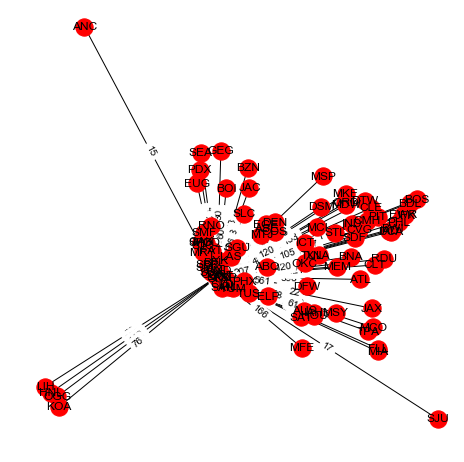

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1275: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


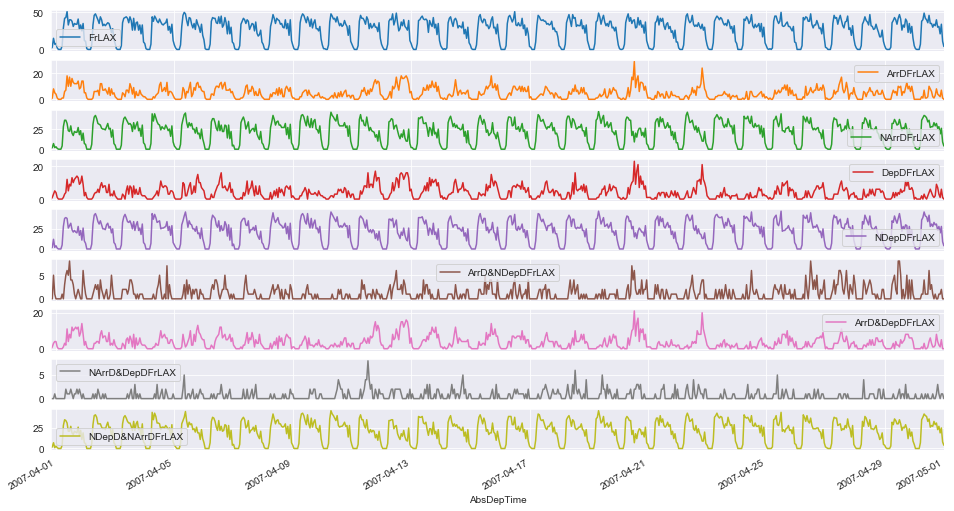

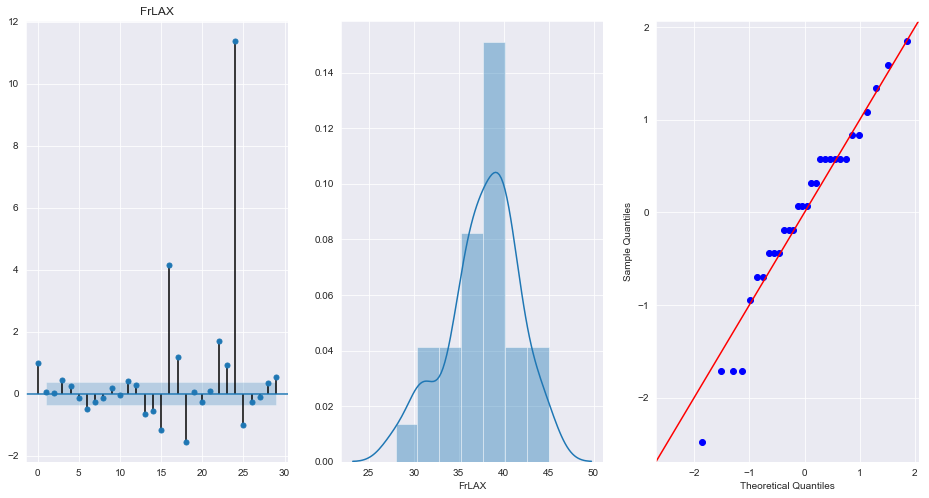

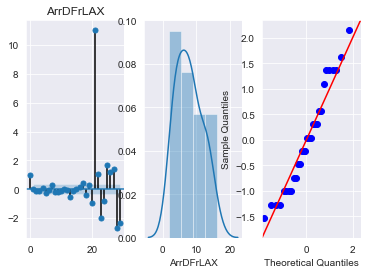

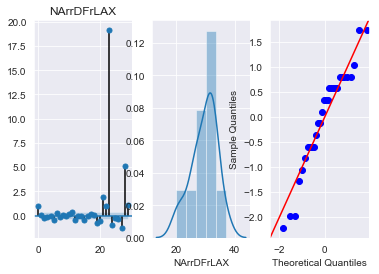

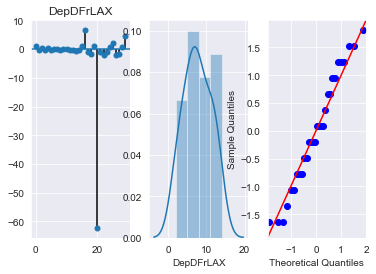

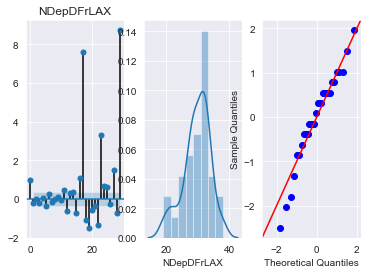

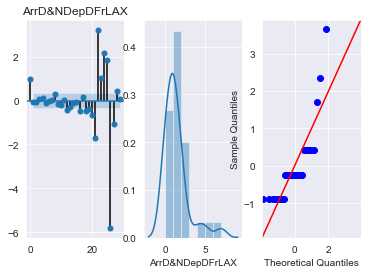

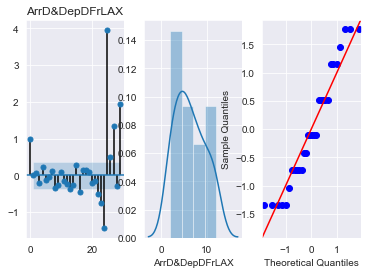

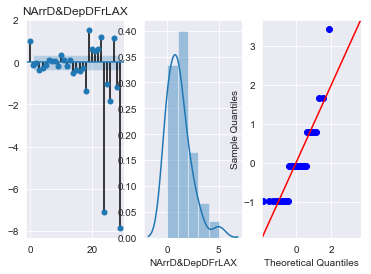

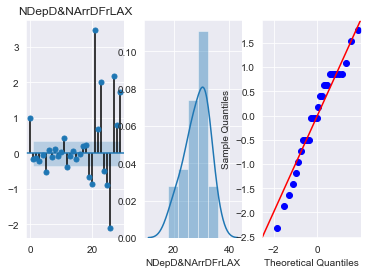

In [98]:
sub_gf_52,lax_df_52,origin_lax_ts_52,sample_lax_ts_52 = analysis_5(start_time = '2007-04-01 01:00:00', 
                                                                   end_time = '2007-5-01 01:00:00',
                                                                   airport = 'LAX' ,
                                                                   init_hour = '18:00:00')

(1465, 2)
(1465, 2)
dt : 1:00:00
start time: 2007-04-01 01:00:00-07:00
start time: 2007-06-01 01:00:00-07:00
All data frame has shape: (1465, 2)


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


JFK  LAX
2007-04-01 01:00:00-07:00    0    0
2007-04-01 02:00:00-07:00    0    0
2007-04-01 03:00:00-07:00    2    0

Year  Month  DayofMonth  DepTime  ArrTime  ArrDelay  DepDelay Origin  \
1420840  2007      3          31     2228      644        24        13    LAX   
1527135  2007      3          31     2304      742        26         4    LAX   
1689063  2007      3          31     2211      612        34        41    LAX   

        Dest  AirTime  TaxiIn  TaxiOut                 AbsDepTime  \
1420840  JFK      283      10       23  2007-03-31 22:28:00-07:00   
1527135  JFK      291      17       30  2007-03-31 23:04:00-07:00   
1689063  JFK      280       8       13  2007-03-31 22:11:00-07:00   

                        AbsArrTime  
1420840  2007-04-01 03:44:00-07:00  
1527135  2007-04-01 04:42:00-07:00  
1689063  2007-04-01 03:12:00-07:00

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


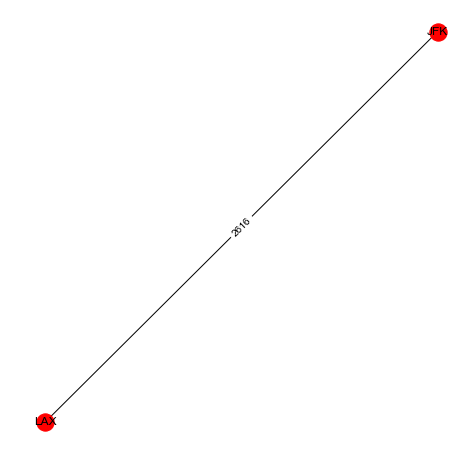

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


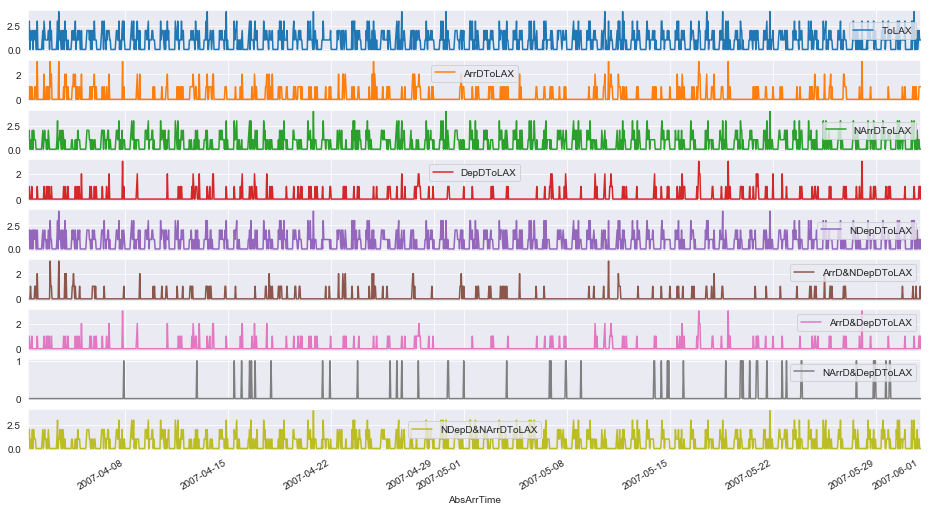

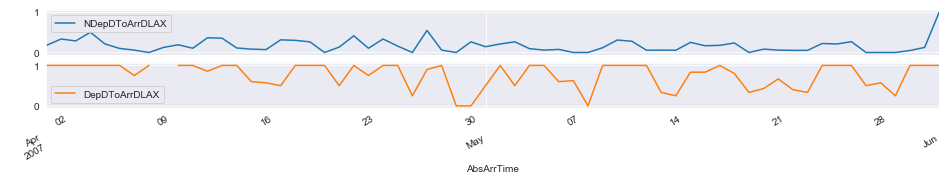

In [59]:
lax_df_61 , origin_lax_ts_61 , origin_lax_ts_by_day_ratio_61 = analysis_6(st_time = '2007-04-01 01:00:00',
                                                                 end_time = '2007-06-01 01:00:00',
                                                                 airport = 'LAX' ,
                                                                 origin = 'JFK') # 

* 固定机场'LAX' 有以下观察：
 
 DepFrLAX 和ArrToLAX 具有很好的规律 分析二1,2，可以用ARIMA模型 分析六。
 
 DepDFLAX 按照每天固定时间采样时，看起来满足正态分布 $~N(\mu,\sigma^2)$
 

* 固定出发机场'LAS',到达机场'LAX'有以下观察

考虑状态转移矩阵
  TOTAL    | NArrD  |ArrD
------------------------------------
  NDepD    |  1-a      __|    a
-------------------------------------
  DepD       ____|     1-b    ____|    b
------------------------------------

采样频率为日时，a在0-0.15之间， b在0.7到1之间，周期性不明显，趋势不明显 分析四1，2. a，b有一定正相关性 分析四1


## 3 Formulation

In [35]:
sub_gf = gf.sub_graph_flow(sub_nodes = None,
                           edges =  ([('LAX','JFK')])
                           sub_gf.describe()
sub_gf.draw_network_attr(with_pos = True)

(17497, 2)
(17497, 2)


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


We distinguish two concepts. For stochastic process $A_{ij}(t)$ $(i,j) \in E,t\in[t_0,t_1]$ , $t$ is continuous valued. $E$
is the directed edge set of $G$. For time series $B_{ij}(t)$ $(i,j) \in E,t\in t_0+\mathbb N  dt$, $t$ is discrete valued.

Let $d_{ij} = (D_{ij}(t),O_{ij}(t))$ be the vector valued time series, where $D_{ij}(t)$ stands for the number of __depart-delayed__ flights from airport $i$ to airport $j$ between $[t,t+dt)$ and $O_{ij}(t)$ stands for the number of __depart-ontime__ flights from airport $i$ to airport $j$ between $[t,t+dt)$. 
$$d_{i}(t) = (D_i(t),O_i(t)) = (\sum_j D_{ij}(t),\sum_j O_{ij}(t)))$$ 

Similarly we define $a_{ij} = (D^a_{ij}(t),O^a_{ij}(t))$ to be the arriving status. 

So our problem become the following estimation:

$$p_i(t) = f({ d_{i}(t) +\sum_k a_{kj}}(t)) \textrm{   with   }f(x,y)=\frac{x}{x+y}.$$

We get estimate $\hat a_{ij} = R_{E_{ij}}(d_{ij}(t)M_{ij})$
For each edge we associate a Markov transition matrix $M_{ij}$

| Total     | ArrDelay | ArrOnTime     |
| :---        |    :----:   |          ---: |
| DepDelay     | $\alpha_{ij}$      |  1-$\alpha_{ij}$   |
| DepOntime   | $\beta_{ij}$        | 1-$\beta_{ij}$    |

And $R_T$ is a right shift operator with $R_T(f(t)) = f(t+T)$

So to estimate $\hat a_{ij}$ we need estimate $E_{ij}$, $\alpha_{ij}$, $\beta_{ij}$.

Following data convince us that this model might be applicable

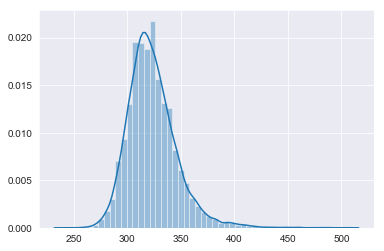

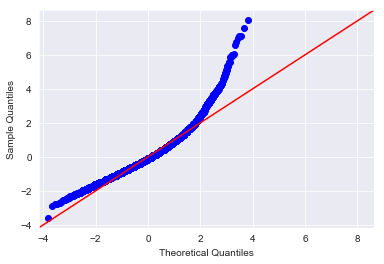

mean:  323.26965582570256 var:  22.874216811112127


In [52]:
import statsmodels.api as sm
import scipy.stats as stats

data = sub_gf.pre_data.AirTime+sub_gf.pre_data.TaxiIn+sub_gf.pre_data.TaxiOut
sns.distplot(data,kde=True)
sm.qqplot(data, stats.norm, fit=True, line='45')
plt.show()
print('mean: ',data.mean(), 'var: ',data.std())

For $i$ being `LAX`, $j$ being `JFK`, $E_{ij}$

(4393, 2)
(4393, 2)


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


dt : 1:00:00
start time: 2007-04-01 01:00:00-07:00
start time: 2007-10-01 01:00:00-07:00
All data frame has shape: (4393, 2)


JFK  LAX
2007-04-01 01:00:00-07:00    0    0
2007-04-01 02:00:00-07:00    0    0
2007-04-01 03:00:00-07:00    2    0

Year  Month  DayofMonth  DepTime  ArrTime  ArrDelay  DepDelay Origin  \
1420840  2007      3          31     2228      644        24        13    LAX   
1527135  2007      3          31     2304      742        26         4    LAX   
1689063  2007      3          31     2211      612        34        41    LAX   

        Dest  AirTime  TaxiIn  TaxiOut                 AbsDepTime  \
1420840  JFK      283      10       23  2007-03-31 22:28:00-07:00   
1527135  JFK      291      17       30  2007-03-31 23:04:00-07:00   
1689063  JFK      280       8       13  2007-03-31 22:11:00-07:00   

                        AbsArrTime  
1420840  2007-04-01 03:44:00-07:00  
1527135  2007-04-01 04:42:00-07:00  
1689063  2007-04-01 03:12:00-07:00

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


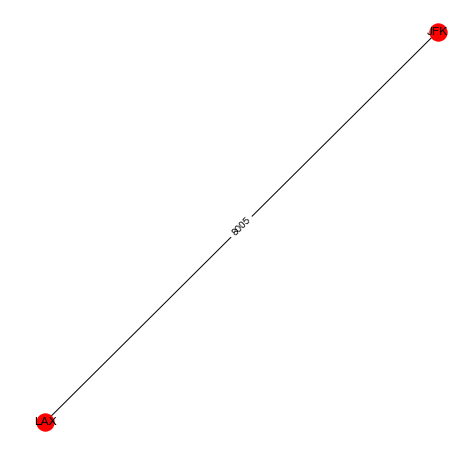

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


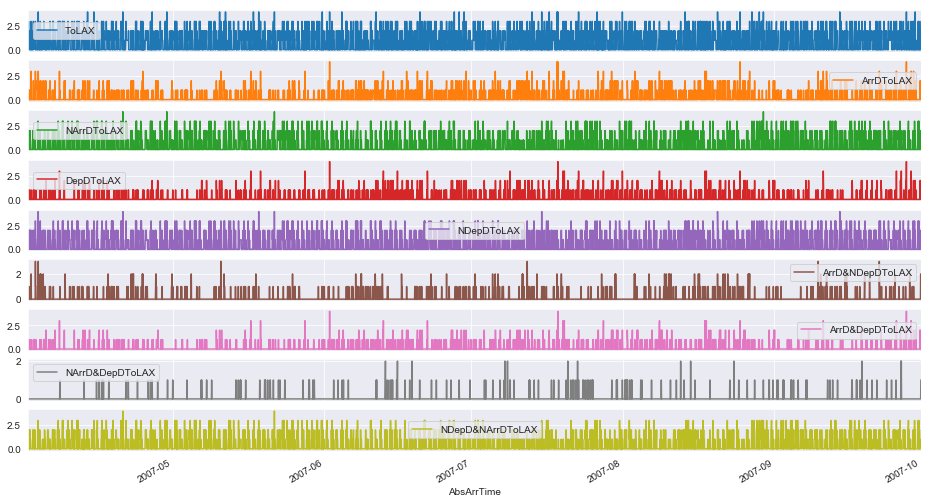

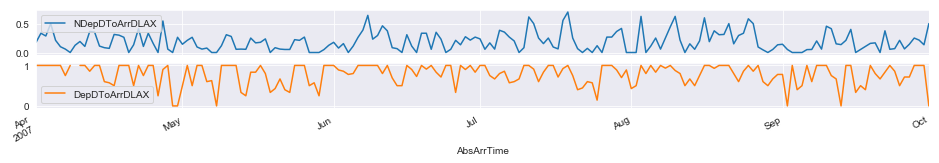

In [61]:
lax_df_61 , origin_lax_ts_61 , origin_lax_ts_by_day_ratio_61 = analysis_6(st_time = '2007-04-01 01:00:00',
                                                                 end_time = '2007-10-01 01:00:00',
                                                                 airport = 'LAX' ,
                                                                 origin = 'JFK') # 

Fit ARIMA: order=(1, 0, 1); AIC=-157.881, BIC=-145.021, Fit time=0.076 seconds
Fit ARIMA: order=(0, 0, 0); AIC=-139.975, BIC=-133.545, Fit time=0.002 seconds
Fit ARIMA: order=(1, 0, 0); AIC=-151.468, BIC=-141.824, Fit time=0.013 seconds
Fit ARIMA: order=(0, 0, 1); AIC=-153.571, BIC=-143.926, Fit time=0.012 seconds
Fit ARIMA: order=(2, 0, 1); AIC=-160.804, BIC=-144.729, Fit time=0.149 seconds
Fit ARIMA: order=(2, 0, 0); AIC=-151.221, BIC=-138.361, Fit time=0.022 seconds
Fit ARIMA: order=(2, 0, 2); AIC=-158.838, BIC=-139.549, Fit time=0.165 seconds
Fit ARIMA: order=(3, 0, 2); AIC=-157.105, BIC=-134.601, Fit time=0.196 seconds
Fit ARIMA: order=(3, 0, 1); AIC=-158.864, BIC=-139.575, Fit time=0.290 seconds
Total fit time: 0.930 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  184
Model:                     ARMA(2, 1)   Log Likelihood                  85.402
Method:               

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


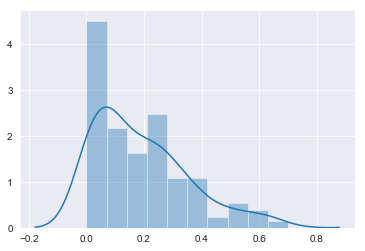

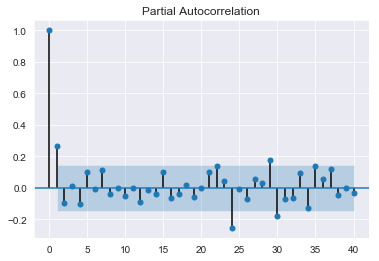

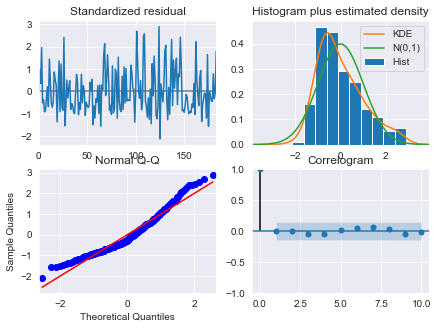

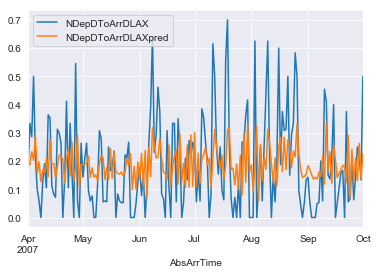

Fit ARIMA: order=(1, 0, 1); AIC=27.939, BIC=40.799, Fit time=0.051 seconds
Fit ARIMA: order=(0, 0, 0); AIC=32.632, BIC=39.062, Fit time=0.003 seconds
Fit ARIMA: order=(1, 0, 0); AIC=26.861, BIC=36.506, Fit time=0.012 seconds
Fit ARIMA: order=(0, 0, 1); AIC=26.001, BIC=35.645, Fit time=0.014 seconds
Fit ARIMA: order=(0, 0, 2); AIC=27.924, BIC=40.784, Fit time=0.028 seconds
Fit ARIMA: order=(1, 0, 2); AIC=27.998, BIC=44.072, Fit time=0.326 seconds
Total fit time: 0.439 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  184
Model:                     ARMA(0, 1)   Log Likelihood                 -10.000
Method:                       css-mle   S.D. of innovations              0.255
Date:                Wed, 28 Aug 2019   AIC                             26.001
Time:                        00:37:52   BIC                             35.645
Sample:                             0   HQIC  

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


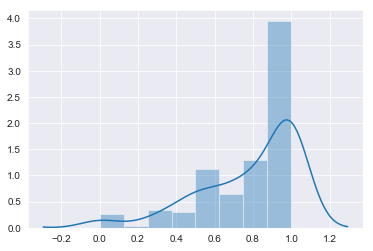

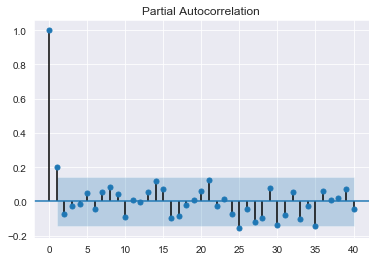

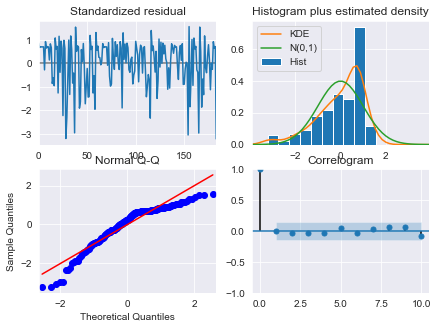

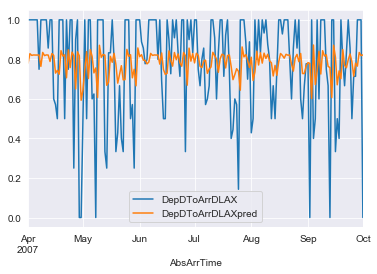

In [119]:
data = origin_lax_ts_by_day_ratio_61.interpolate(method ='linear', limit_direction ='forward') 
for column in data.columns:
    #display(data[column])
    sns.distplot(data[column].values,kde=True)
    plot_pacf(data[column],lags=40)
    model = pm.auto_arima(data[column].values, start_p = 1, start_q = 1,
                      test = 'adf',       # use adftest to find optimal 'd'
                      max_p = 3, max_q = 3, # maximum p and q
                      m = 1,              # frequency of series
                      d = None,           # let model determine 'd'
                      seasonal = False,   # No Seasonality
                      start_P = 0, 
                      D = 0, 
                      trace = True,
                      error_action = 'ignore',  
                      suppress_warnings = True, 
                      stepwise = True)
    print(model.summary())
    model.plot_diagnostics(figsize=(7,5))
    data[column + 'pred'] = model.predict_in_sample()
    data[[column,column + 'pred']].plot(subplots = False)
    plt.show()


To estimate $d_{ij} = D_{ij}(t),O_{ij}(t)$. 

First Notice that $T_i(t) =  D_{i}(t)+ O_{i}(t)$  is quite regular. We use ARIMA model to give and estimation $\hat T_i(t)$.  

For $D_{i}(t) $ We assume 
$$D_{i}(t) \sim N(\mu_{ih(t)}, \sigma^2_{ih(t)})
$$ 
or 
$$
    D_{i}(t) \sim Poisson(\mu_{ih(t)})
$$
by the following data. We can see that for a fixed hour of $t$. Few trand and time dependancy occurs

(1465, 91)
(1465, 91)
dt : 1:00:00
start time: 2007-04-01 01:00:00-07:00
start time: 2007-06-01 01:00:00-07:00
All data frame has shape: (1465, 91)


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


ABQ  ANC  ASE  ATL  AUS  BDL  BFL  BNA  BOI  BOS  \
2007-04-01 01:00:00-07:00    0    0    0    0    0    0    0    0    0    0   
2007-04-01 02:00:00-07:00    0    0    0    1    0    0    0    0    0    0   
2007-04-01 03:00:00-07:00    0    0    0    1    0    0    0    0    0    1   

                           ...  SLC  SMF  SMX  SNA  STL  TPA  TUL  TUS  XNA  \
2007-04-01 01:00:00-07:00  ...    0    0    0    0    0    0    0    0    0   
2007-04-01 02:00:00-07:00  ...    0    0    0    0    0    1    0    0    0   
2007-04-01 03:00:00-07:00  ...    0    0    0    0    0    0    0    0    0   

                           YUM  
2007-04-01 01:00:00-07:00    0  
2007-04-01 02:00:00-07:00    0  
2007-04-01 03:00:00-07:00    0  

[3 rows x 91 columns]

Year  Month  DayofMonth  DepTime  ArrTime  ArrDelay  DepDelay Origin  \
1420840  2007      3          31     2228      644        24        13    LAX   
1422552  2007      3          31     2218      623         8         8    LAX   
1423278  2007      3          31     2336      518        16        21    LAX   

        Dest  AirTime  TaxiIn  TaxiOut                 AbsDepTime  \
1420840  JFK      283      10       23  2007-03-31 22:28:00-07:00   
1422552  EWR      274       8       23  2007-03-31 22:18:00-07:00   
1423278  ORD      201       6       15  2007-03-31 23:36:00-07:00   

                        AbsArrTime  
1420840  2007-04-01 03:44:00-07:00  
1422552  2007-04-01 03:23:00-07:00  
1423278  2007-04-01 03:18:00-07:00

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


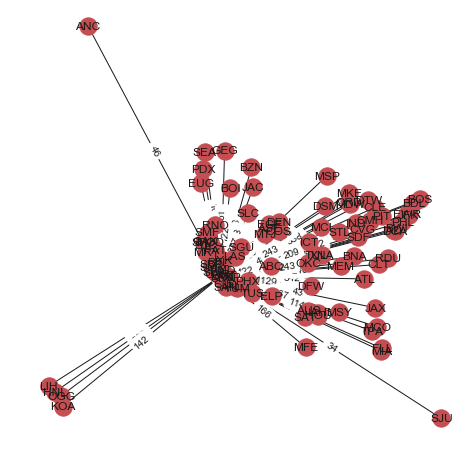

fit for 09:00:00


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


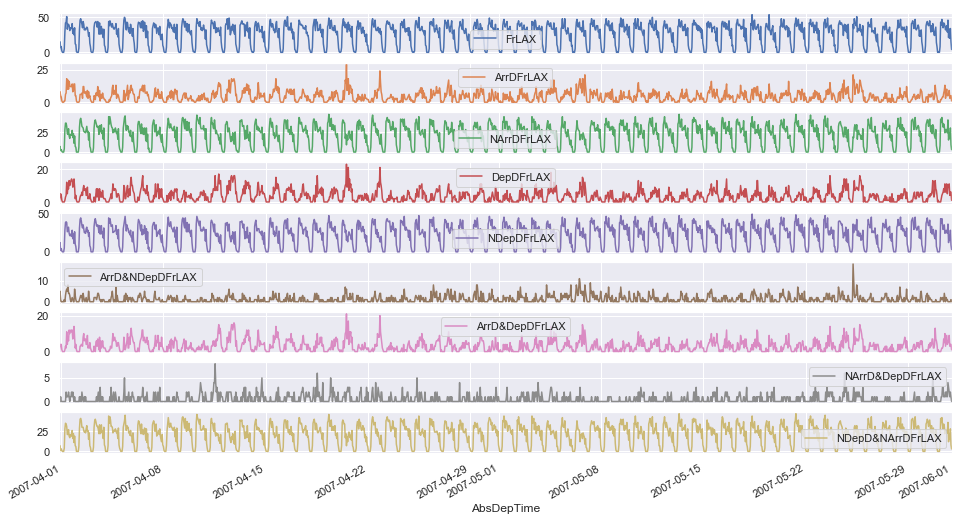

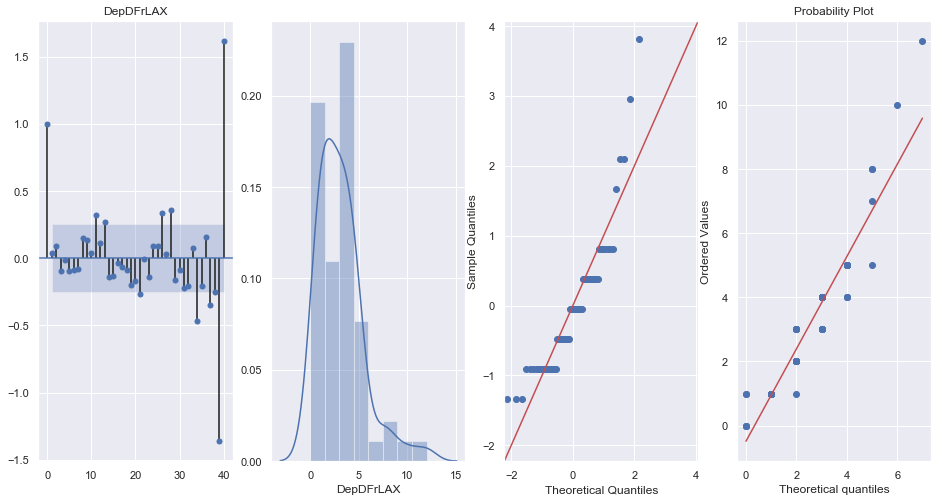

fit for 10:00:00


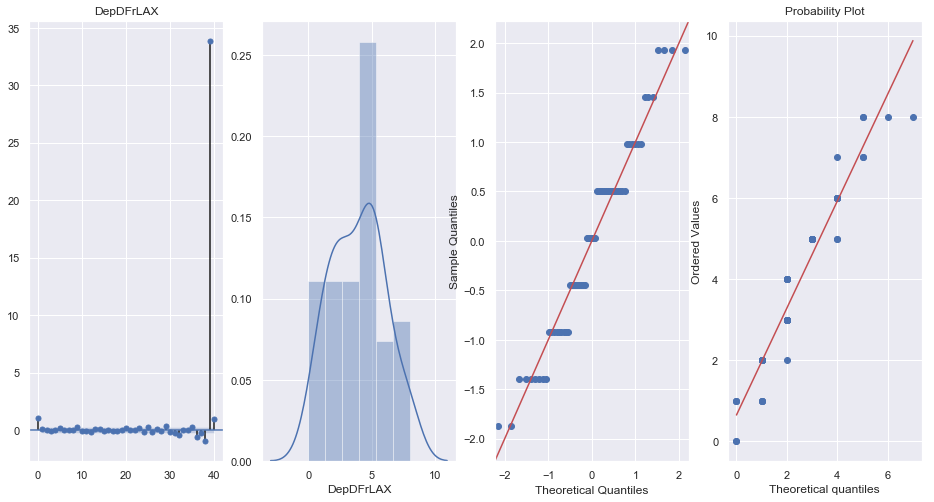

fit for 11:00:00


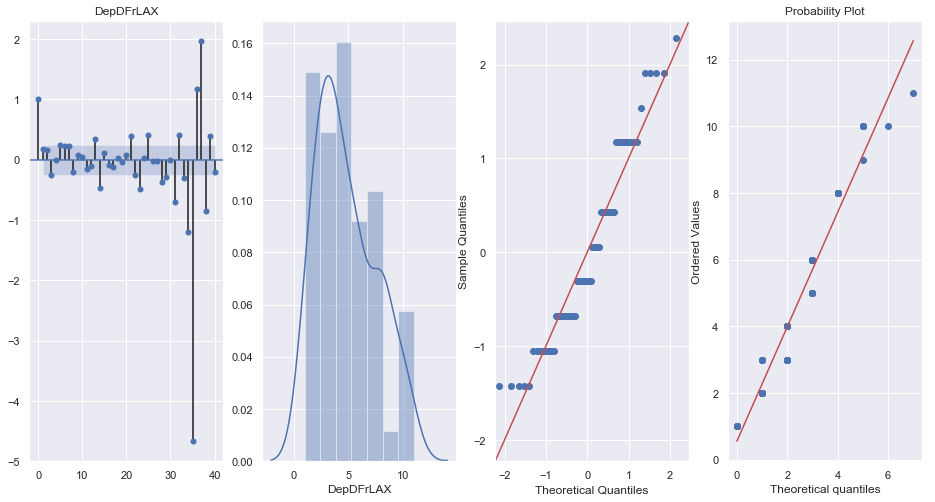

fit for 12:00:00


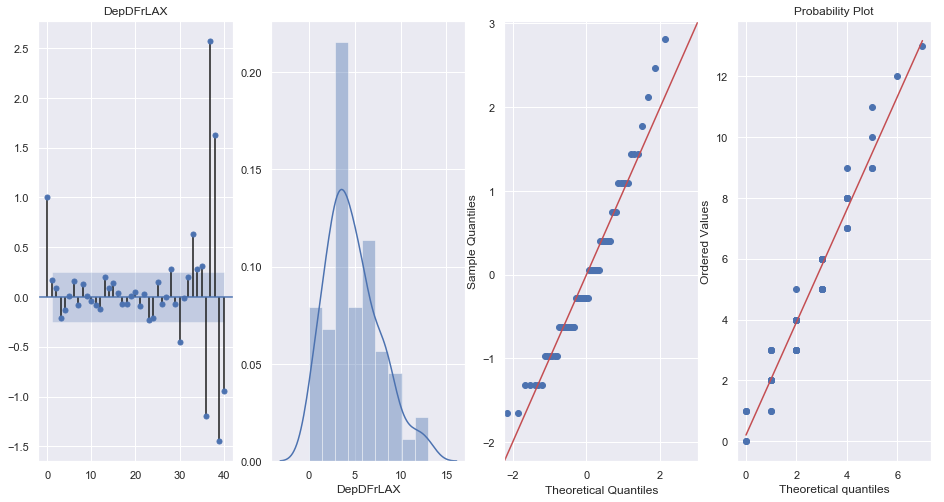

fit for 13:00:00


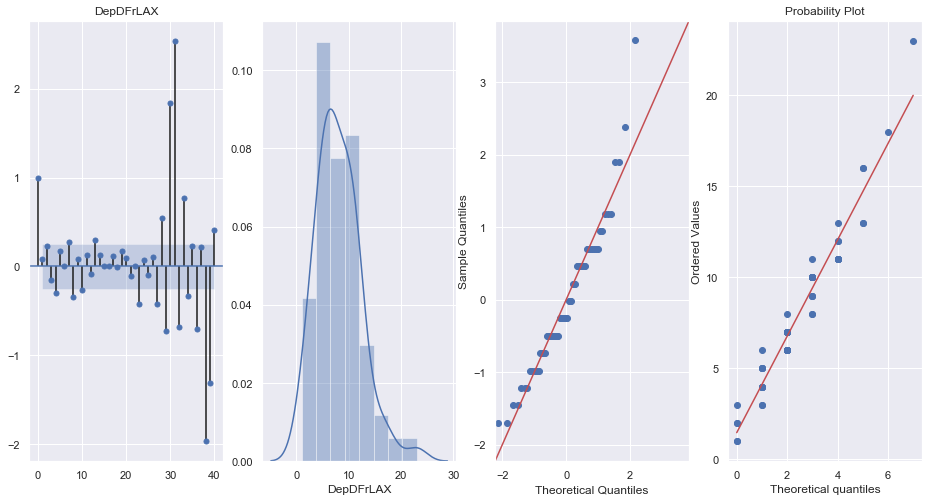

fit for 14:00:00


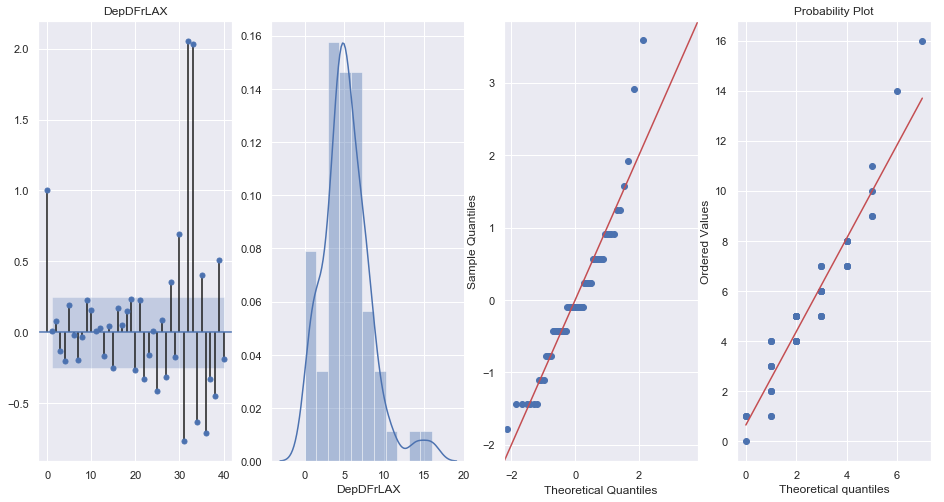

fit for 15:00:00


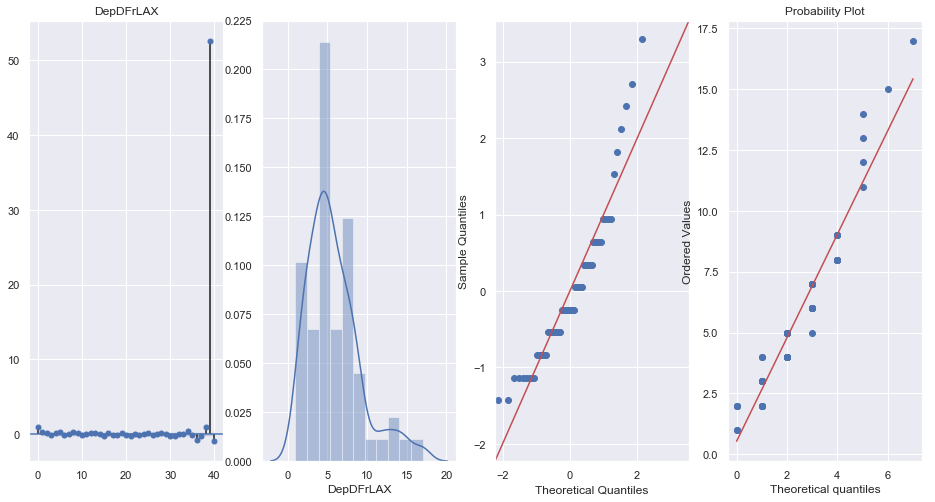

fit for 16:00:00


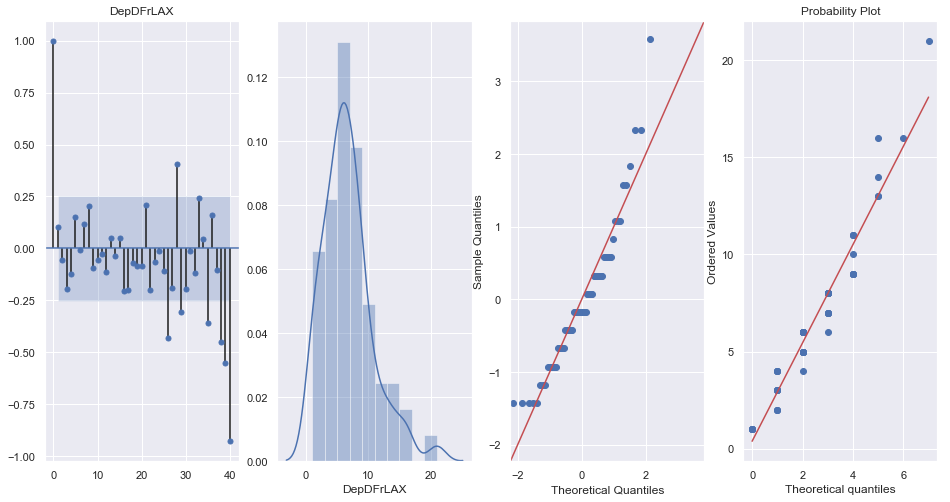

fit for 17:00:00


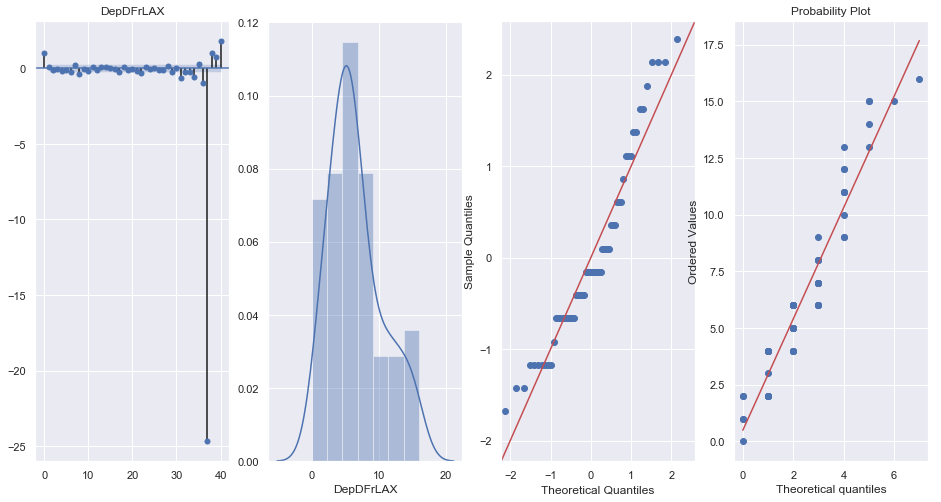

fit for 18:00:00


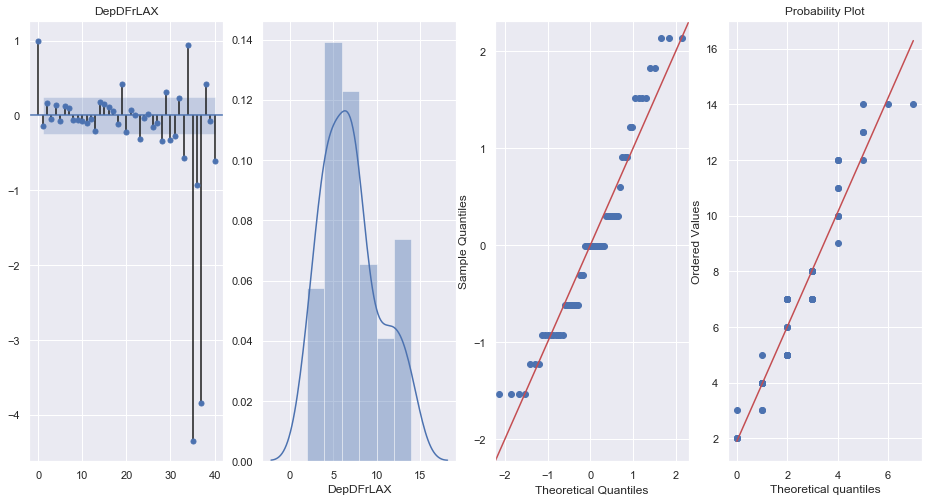

fit for 19:00:00


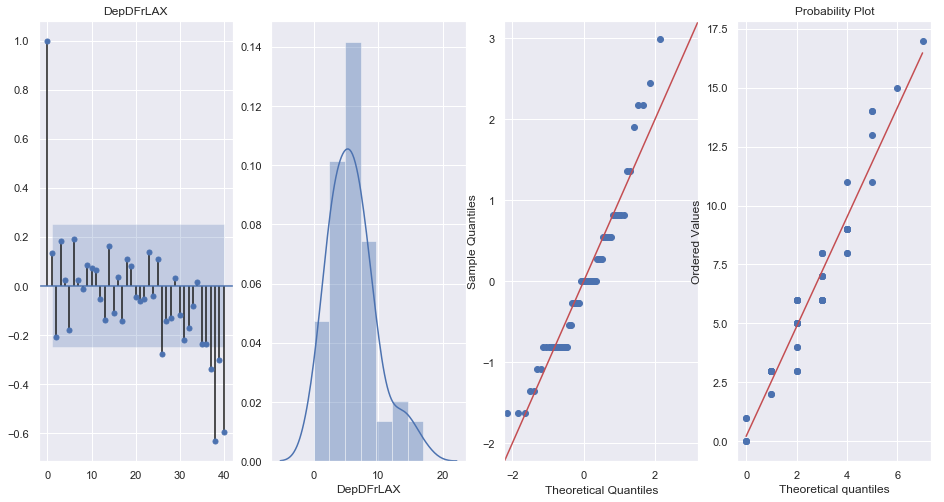

fit for 20:00:00


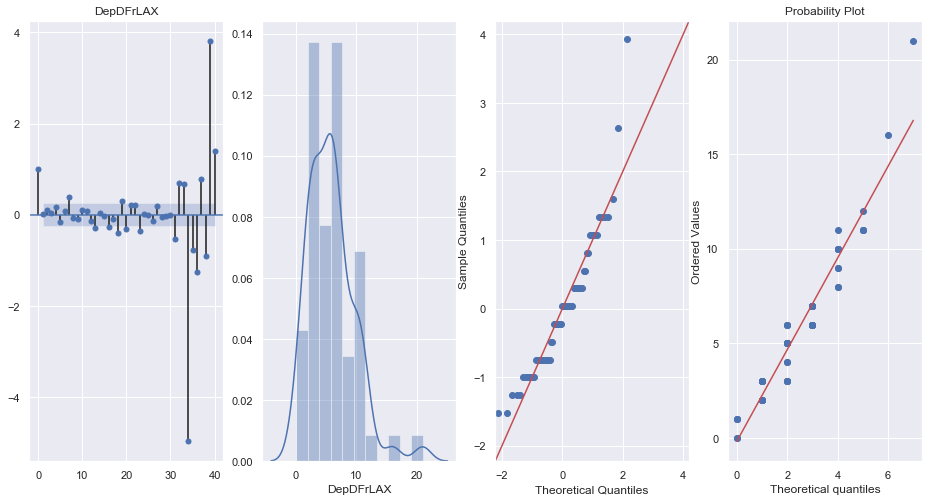

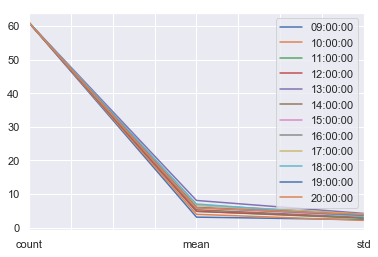

In [159]:
init_hours = [x[11:19]for x in list(pd.date_range("09:00:00","20:00:00",freq='H').astype(str))]
sub_gf_71,lax_df_71,origin_lax_ts_71,hist_71 = analysis_7(start_time = '2007-04-01 01:00:00',
                                                       end_time = '2007-06-01 01:00:00', 
                                                       airport = 'LAX' , 
                                                       init_hours = init_hours)
hist_71.loc[['count','mean','std']].plot()

some figures

Some standard stachastic parameta esitimation for normal distrbution gives us estimation $\hat \mu_{ih(t)}$ and we use this as $\hat D_{i}(t)$

## 4 Playground

In [174]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

sub_nodes=set(['LAX','LAS','OGG','HNL','ORD','DFW','DEN','JFK'])
sub_gf=gf.sub_graph_flow('2007-02-01 01:00:00','2007-02-15 01:00:00',sub_nodes)

df = origin_lax_ts[['ToLAX']]

model = pm.auto_arima(df.values, start_p = 1, start_q = 1,
                      test = 'adf',       # use adftest to find optimal 'd'
                      max_p = 3, max_q = 3, # maximum p and q
                      m = 1,              # frequency of series
                      d = None,           # let model determine 'd'
                      seasonal = False,   # No Seasonality
                      start_P = 0, 
                      D = 0, 
                      trace = True,
                      error_action = 'ignore',  
                      suppress_warnings = True, 
                      stepwise = True)

print(model.summary())

model.plot_diagnostics(figsize=(7,5))
df.plot()
plt.show()

(337, 8)
(337, 8)


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


KeyError: "None of [Index(['ToLAX'], dtype='object')] are in the [columns]"

In [ ]:
dt = sub_gf.dt
lax_pre_data = sub_gf.pre_data[sub_gf.pre_data.Dest == 'LAX']
las_ts = pd.concat(orgin_dfs_gen('LAS',lax_pre_data),sort = False).sort_index().groupby(pd.Grouper( freq = dt)).count()
las_ts.plot(subplots = True)

In [ ]:
sub_gf = gf.sub_graph_flow('2007-02-01 01:00:00','2007-02-15 01:00:00',sub_nodes = None, edges = [('LAX','JFK')])
sub_gf.describe()

In [ ]:
data = sub_gf.pre_data.groupby(['Origin','Dest']).filter(lambda x : x.name ==('LAX','JFK') )

In [ ]:
data.head()
sns.distplot(data.DepDelay,kde=True)
plt.show()
sns.distplot(data.ArrDelay,kde=True)
plt.show()

In [24]:
# Analysis 5
# bug 03/11/07,11/4/07,03/09/08,11/02/08 can not be between start_time and end_time
def analysis_6(start_time, end_time,airport ,dest_airport, init_hour = '13:00:00'):
    sub_gf = gf.sub_graph_flow(start_time,end_time,sub_nodes = None,
                           edges =  set([(airport ,dest_airport)]))# ~2min
    sub_gf.describe()
    sub_gf.draw_network_attr(with_pos = True)
    dt = sub_gf.dt

    lax_pre_data = sub_gf.pre_data
    lax_dep = pd.DataFrame(index = pd.to_datetime(lax_pre_data.AbsDepTime), columns = ['Fr'+ airport],data = 1)

    lax_arrdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.ArrDelay >15].AbsDepTime),
                                 columns = ['ArrDFr' +airport],data = 1)

    lax_not_arrdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.ArrDelay <15].AbsDepTime),
                                 columns = ['NArrDFr' +airport],data = 1)

    lax_depdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.DepDelay >15].AbsDepTime),
                                 columns = ['DepDFr' +airport],data = 1)

    lax_not_depdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.DepDelay <15].AbsDepTime),
                                 columns = ['NDepDFr' +airport],data = 1)

    lax_arrdelay_not_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay >15) & (lax_pre_data.DepDelay <15)].AbsDepTime),
        columns = ['ArrD&NDepDFr' +airport],data = 1)

    lax_arrdelay_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay >15) & (lax_pre_data.DepDelay >15)].AbsDepTime),
        columns = ['ArrD&DepDFr' +airport],data = 1)

    lax_not_arrdelay_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay <15) & (lax_pre_data.DepDelay >15)].AbsDepTime),
        columns = ['NArrD&DepDFr' +airport],data = 1)

    lax_not_arrndelay_not_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay <15) & (lax_pre_data.DepDelay <15)].AbsDepTime),
        columns = ['NDepD&NArrDFr' +airport],data = 1)

    lax_df = pd.concat([lax_dep, lax_arrdelay,lax_not_arrdelay,lax_depdelay,lax_not_depdelay,
                       lax_arrdelay_not_depdelay,lax_arrdelay_depdelay,
                       lax_not_arrdelay_depdelay,lax_not_arrndelay_not_depdelay],sort = False).sort_index()

    origin_lax_ts = lax_df.groupby(pd.Grouper( freq= dt)).count()

    origin_lax_ts_by_day = origin_lax_ts.groupby(pd.Grouper( freq= 'D')).sum()

    origin_lax_ts.plot(subplots=True, legend=True,figsize=(16,origin_lax_ts.shape[1]));


    sample_lax_ts = origin_lax_ts.loc[pd.date_range(start= start_time[:11]+init_hour,end = end_time,freq='D',tz=timezone('America/Los_Angeles'))]
    sample_lax_ts.plot(subplots=True, legend=True,figsize=(16,9))

    for column in sample_lax_ts.columns:
        plot_acf(sample_lax_ts[column] , ax= plt.subplot(1, 2, 1),title = column)
        plt.subplot(1, 2, 2)
        sns.distplot(sample_lax_ts[column],kde=True)
        plt.show()
    return sub_gf,lax_df,origin_lax_ts,sample_lax_ts



In [ ]:
data.plot.scatter('DepDelay','ArrDelay')

(721, 2)
(721, 2)
dt : 1:00:00
start time: 2007-04-01 01:00:00-07:00
start time: 2007-05-01 01:00:00-07:00
All data frame has shape: (721, 2)


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


JFK  LAX
2007-04-01 01:00:00-07:00    0    0
2007-04-01 02:00:00-07:00    0    0
2007-04-01 03:00:00-07:00    2    0

Year  Month  DayofMonth  DepTime  ArrTime  ArrDelay  DepDelay Origin  \
1420840  2007      3          31     2228      644        24        13    LAX   
1527135  2007      3          31     2304      742        26         4    LAX   
1689063  2007      3          31     2211      612        34        41    LAX   

        Dest  AirTime  TaxiIn  TaxiOut                 AbsDepTime  \
1420840  JFK      283      10       23  2007-03-31 22:28:00-07:00   
1527135  JFK      291      17       30  2007-03-31 23:04:00-07:00   
1689063  JFK      280       8       13  2007-03-31 22:11:00-07:00   

                        AbsArrTime  
1420840  2007-04-01 03:44:00-07:00  
1527135  2007-04-01 04:42:00-07:00  
1689063  2007-04-01 03:12:00-07:00

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


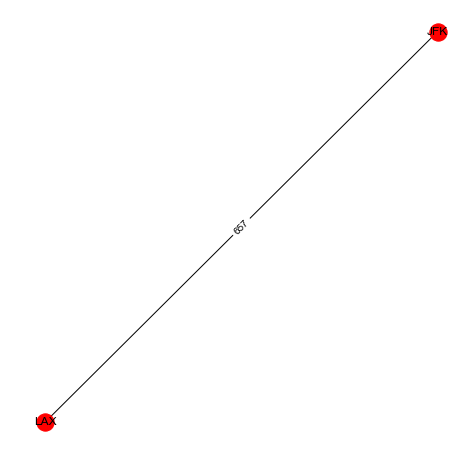

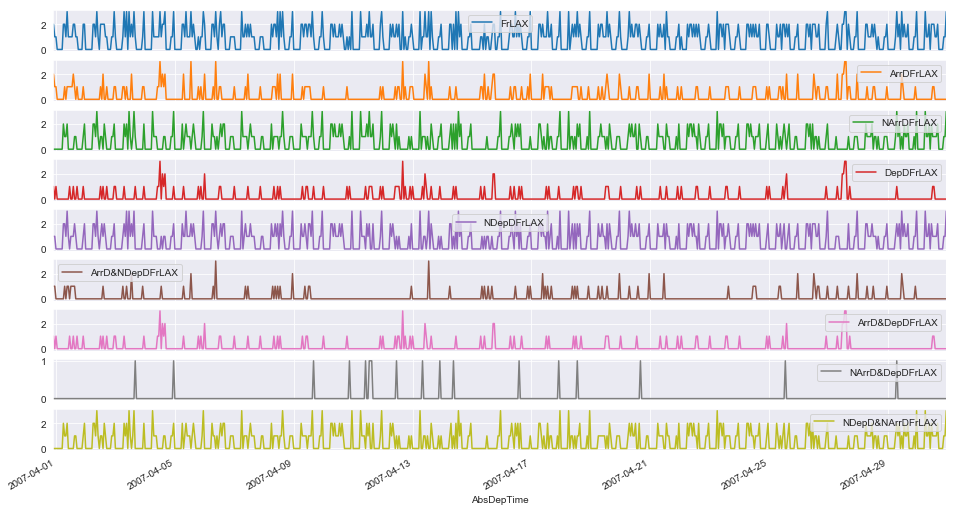

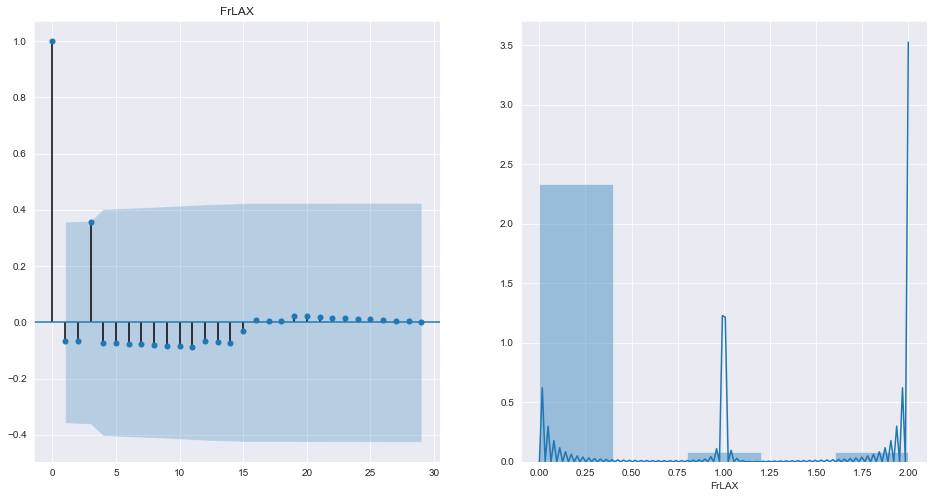

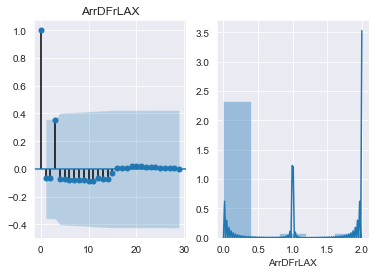

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:476: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]
C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


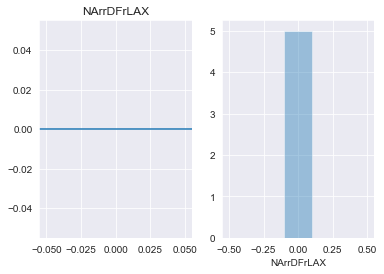

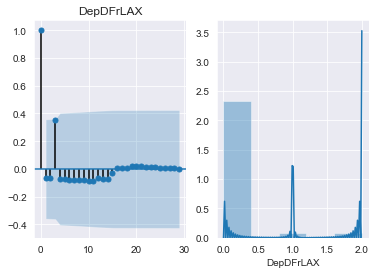

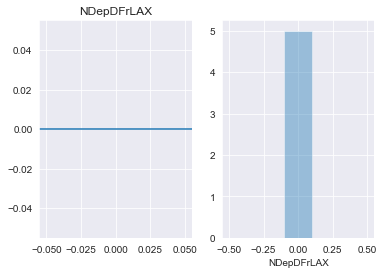

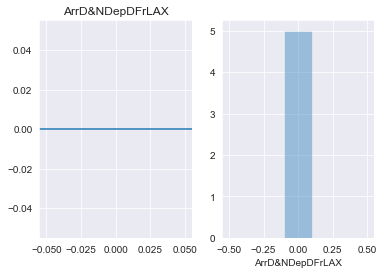

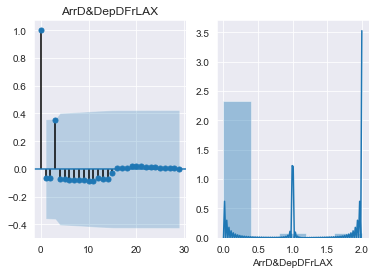

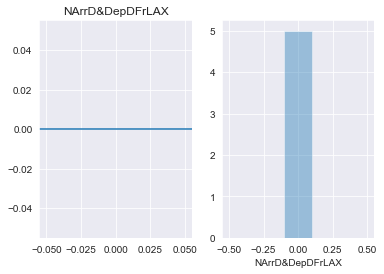

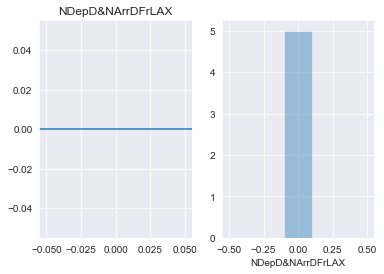

In [167]:
analysis_6(start_time = '2007-04-01 01:00:00', end_time = '2007-5-01 01:00:00', airport = 'LAX' ,dest_airport = 'JFK', init_hour = '18:00:00')

In [92]:
def fun_1_ts_pre_gen(data,airports):
    columns=['Year',	'Month',	'DayofMonth','DepTime',	'ArrTime','ArrDelay','DepDelay','Origin',	'Dest','AirTime','TaxiIn','TaxiOut'	]
    data=data[columns]
    data_c=data.copy()
    t=time()
    AbsDepTime_gen=fun_1_functional('Dep',airports)
    data_c['AbsDepTime']=data.apply(AbsDepTime_gen,axis=1)
    print('++++++++++++++++++++++++  ts pre gen is half way:',time()-t,' ++++++++++++++++++++++++')
    AbsArrTime_gen=fun_1_functional('Arr',airports)
    data_c['AbsArrTime']=data.apply(AbsArrTime_gen,axis=1)
    print('++++++++++++++++++++++++  ts pre gen is almost done :',time()-t,' ++++++++++++++++++++++++')

    return data_c
  
def fun_1_functional(attr,airports):#attr = 'Dep' or 'Arr'
    LAX_tz = timezone('America/Los_Angeles')
    def abstime_dep(df):
        hour_24_mod=timedelta()
        next_day_mod=timedelta()
        if attr=='Dep':
            hour=df[attr+'Time']//100
            minute=df[attr+'Time']%100
            tz=timezone(tf.timezone_at(lng=airports.loc[df['Origin']].long, lat=airports.loc[df['Origin']].lat))
        if attr=='Arr':
            hour=df[attr+'Time']//100
            minute=df[attr+'Time']%100
            tz=timezone(G.nodes[df['Dest']]['time_zone'])
            if int(df.ArrTime)+1200<int(df.DepTime):
                next_day_mod=timedelta(days=1)
                
        if hour>=24:
            if hour==24:
                hour_24_mod=timedelta(days=1)
                hour = 0
            else:
                print(df)
                raise
        dt=datetime(year=df['Year'],month=df['Month'],day=df['DayofMonth'],hour = hour,minute = minute)+hour_24_mod+next_day_mod
        loc_dt=tz.localize(dt).astimezone(LAX_tz)       
        return loc_dt
    return abstime_dep